# Amazon Sale Report

## Standardize data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

df1 = pd.read_csv("Sale_Report.csv", header=0)

In [83]:
# replace '-' with '_' and lowercase all column names
df = pd.read_csv("Amazon_Sale_Report.csv", header=0, encoding="utf-8")
df.columns = [col.strip().replace("-", "_").lower() for col in df.columns]
df.to_csv("standardized_Amazon_Sale_Report.csv", index=False)


## Clean data

In [84]:
df = pd.read_csv("standardized_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
print(df.head())
print(df.info())

   index             order id      date                        status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  fulfilment sales channel ship_service_level    style              sku  \
0   Merchant     Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant     Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon     Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        category  ... currency  amount    ship_city   ship_state  \
0            Set  ...      INR  647.62    

In [85]:
# missing values
missing_values = df.isnull()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values.sum())

Missing Values Count:
index                     0
order id                  0
date                      0
status                    0
fulfilment                0
sales channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
unnamed: 22           49050
dtype: int64


In [86]:
df = pd.read_csv("standardized_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# Displaying the unique values in 'unnamed: 22'
unique_values_unnamed_22 = df ['unnamed: 22'].unique()
num_unique_values_unnamed_22 = len(unique_values_unnamed_22)
# Printing the first few entries to get a sense of what kind of data it contains
sample_values_unnamed_22 = unique_values_unnamed_22[:5]
print(f"Unique values in 'unnamed: 22':\n{unique_values_unnamed_22}")
print(f"Number of unique values in 'unnamed: 22': {num_unique_values_unnamed_22}")
print(f"Sample values from 'unnamed: 22':\ n{sample_values_unnamed_22}")

Unique values in 'unnamed: 22':
[nan False]
Number of unique values in 'unnamed: 22': 2
Sample values from 'unnamed: 22':\ n[nan False]


In [87]:
import pandas as pd
# remove the column
df = pd.read_csv("standardized_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
dropped_columns = df.drop(columns=['unnamed: 22'], inplace=True)
# save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)


In [88]:
# check missing data
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
missing_values = df.isnull().sum()
print(df.isnull().sum())

index                     0
order id                  0
date                      0
status                    0
fulfilment                0
sales channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
dtype: int64


In [89]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# count unique value in 'courier' status, excluding missing values
print(df['courier status'].value_counts(dropna=False))
# fill in the missing values with 'Unknown'
df['courier status'].fillna('Unknown', inplace=True)
print('-----------------------------')
print('Unique value counts after changing NaN:')
print(df['courier status'].value_counts(dropna=False))
# save
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)

Shipped      109487
NaN            6872
Unshipped      6681
Cancelled      5935
Name: courier status, dtype: int64
-----------------------------
Unique value counts after changing NaN:
Shipped      109487
Unknown        6872
Unshipped      6681
Cancelled      5935
Name: courier status, dtype: int64


In [90]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# look for unique values per group in 'sales channel' in 'currency', including missing values
print(df.groupby('sales channel')
['currency'].value_counts(dropna=False))

# imputing missing 'currency' for 'Amazon.in' sales channel with 'INR'
df.loc[(df['sales channel'] == 'Amazon.in') & (df['currency'].isnull()), 'currency'] = 'INR'

# for the 'Non-Amazon' sales channel, we mark the currency of 'NaN' as 'Unknown'
df.loc[(df['sales channel'] == 'Non-Amazon') & (df['currency'].isnull()), 'currency'] = 'Unknown'
print('----------------------')
print('After Imputation:')
print(df.groupby('sales channel')
['currency'].value_counts(dropna=False))
# save
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)

sales channel  currency
Amazon.in      INR         121180
               NaN           7671
Non-Amazon     NaN            124
Name: currency, dtype: int64
----------------------
After Imputation:
sales channel  currency
Amazon.in      INR         128851
Non-Amazon     Unknown        124
Name: currency, dtype: int64


In [91]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# investigating if missing shipping details are from the same rows
missing_shipping_info = df[df['ship_city'].isnull() &
df['ship_state'].isnull() &
                             df['ship_postal_code'].isnull() & df['ship_country'].isnull()]
print(missing_shipping_info)

         index             order id      date                        status  \
1871      1871  404-0566904-4825137  04-29-22                       Shipped   
1872      1872  404-0566904-4825137  04-29-22                       Shipped   
8752      8752  406-4003386-8768363  04-25-22                       Shipped   
11215    11215  402-0107720-7057168  04-23-22                       Shipped   
13252    13252  407-4532637-8415521  04-22-22                     Cancelled   
15688    15688  404-9229894-8608305  04-21-22                       Shipped   
16787    16787  402-4919636-4333150  04-20-22  Shipped - Delivered to Buyer   
18351    18351  405-4927647-8064368  04-19-22                       Shipped   
22930    22930  402-8628677-0457954  04-16-22  Shipped - Returned to Seller   
24986    24986  406-4079063-8291520  04-15-22                     Cancelled   
30379    30379  404-7506843-7913132  04-12-22  Shipped - Delivered to Buyer   
37963    37963  407-3064376-9158743  04-08-22       

In [92]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# replace missing shipping details as 'Unknown'
shipping_columns = ['ship_city', 'ship_state', 'ship_postal_code','ship_country']
for column in shipping_columns:
    df[column].fillna('Unknown', inplace=True)
print('Total missing values:')
print(df[shipping_columns].isnull().sum())
# save
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)

Total missing values:
ship_city           0
ship_state          0
ship_postal_code    0
ship_country        0
dtype: int64


In [93]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# seems that 'promotion_ids' means there is no promotion applied in this dataset, so we fill 'NaN' with 'No Promotion'
df['promotion_ids'].fillna('No Promotion', inplace=True)
# let's say if NaN are not 'Easy Ship' we can fill it with 'normal ship'
df['fulfilled_by'].fillna('Normal Ship', inplace=True)

# check missing values
print('Total missing values:')
print(df[['promotion_ids', 'fulfilled_by']].isnull().sum())

# save
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)

Total missing values:
promotion_ids    0
fulfilled_by     0
dtype: int64


In [94]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# converting 'ship_postal_code' to string while preserving leading zeros
# we ensure the postal code has minimum lentgh of 5 charachters
df['ship_postal_code'] = df['ship_postal_code'].apply(lambda x: '{:0>5}'.format(x) if pd.notnull(x) else x)

# save
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)


## Categorical columns

In [95]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# use category data type for categorical columns
categorical_columns = ['status', 'fulfilment', 'sales channel',
'ship_service_level',
'currency',
'promotion_ids',
'style', 'category', 'size', 'courier status',
'ship_city', 'ship_state', 'ship_country',
'fulfilled_by']
for column in categorical_columns:
    df[column] = df[column].astype('category')
# print column types
print(df.dtypes)

# remove duplicates
original_rows = len(df)

df.drop_duplicates(inplace=True)

# get the number of rows after removing duplicates
remaining_rows = len(df)
duplicates_removed = original_rows - remaining_rows
print(f"Number of duplicates removed: {duplicates_removed}")

# save
df.to_csv("cleaned_Amazon_Sale_Report.csv", index=False)

index                    int64
order id                object
date                    object
status                category
fulfilment            category
sales channel         category
ship_service_level    category
style                 category
sku                     object
category              category
size                  category
asin                    object
courier status        category
qty                      int64
currency              category
amount                 float64
ship_city             category
ship_state            category
ship_postal_code        object
ship_country          category
promotion_ids         category
b2b                       bool
fulfilled_by          category
dtype: object
Number of duplicates removed: 0


## Visualizations

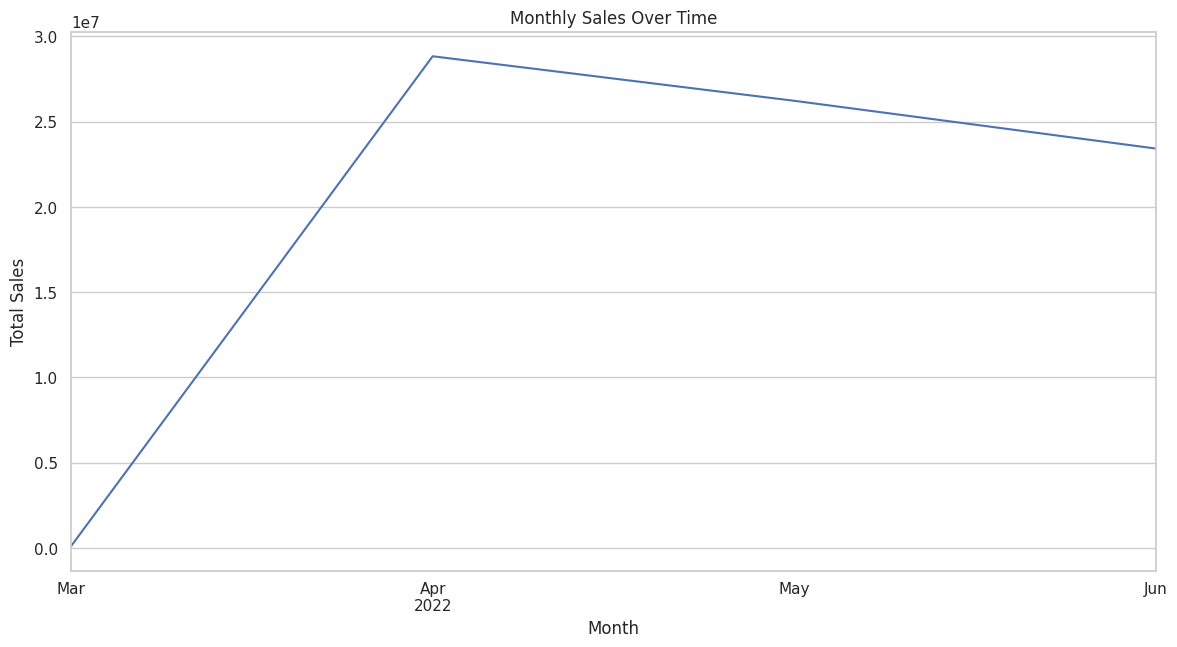

In [96]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# converting 'Date' from object to datetime
df['date'] = pd.to_datetime(df['date'])
sns.set_style('whitegrid')
# resample to monthly sales and plot
monthly_sales = df.resample('M', on='date')['amount'].sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [97]:
missing_values = df.isnull()
print(missing_values)

        index  order id   date  status  fulfilment  sales channel  \
0       False     False  False   False       False          False   
1       False     False  False   False       False          False   
2       False     False  False   False       False          False   
3       False     False  False   False       False          False   
4       False     False  False   False       False          False   
...       ...       ...    ...     ...         ...            ...   
128970  False     False  False   False       False          False   
128971  False     False  False   False       False          False   
128972  False     False  False   False       False          False   
128973  False     False  False   False       False          False   
128974  False     False  False   False       False          False   

        ship_service_level  style    sku  category  ...    qty  currency  \
0                    False  False  False     False  ...  False     False   
1                  

['index', 'order id', 'date', 'status', 'fulfilment', 'sales channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']


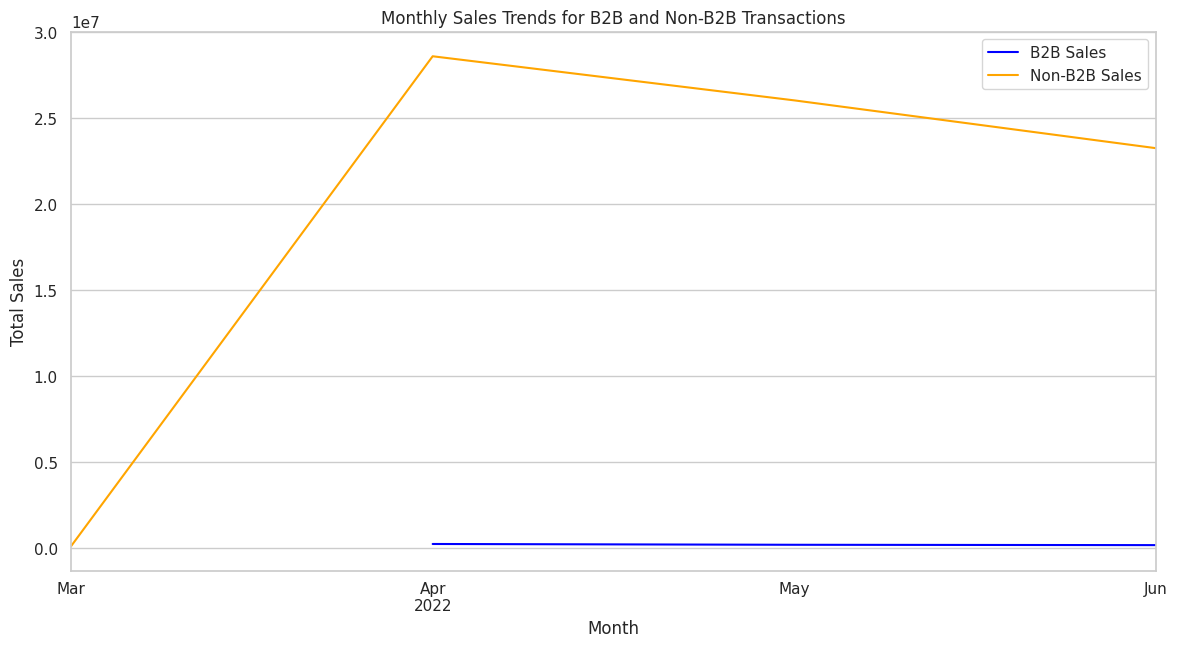

In [98]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
df['date'] = pd.to_datetime(df['date'])
column_headers = df.columns.tolist()
print(column_headers)
monthly_sales_b2b = df[df['b2b']].resample('M', on='date')['amount'].sum()

monthly_sales_non_b2b = df[~df['b2b']].resample('M', on='date')['amount'].sum()
plt.figure(figsize=(14, 7))
monthly_sales_b2b.plot(label='B2B Sales', color='blue')
monthly_sales_non_b2b.plot(label='Non-B2B Sales', color='orange')
plt.title('Monthly Sales Trends for B2B and Non-B2B Transactions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

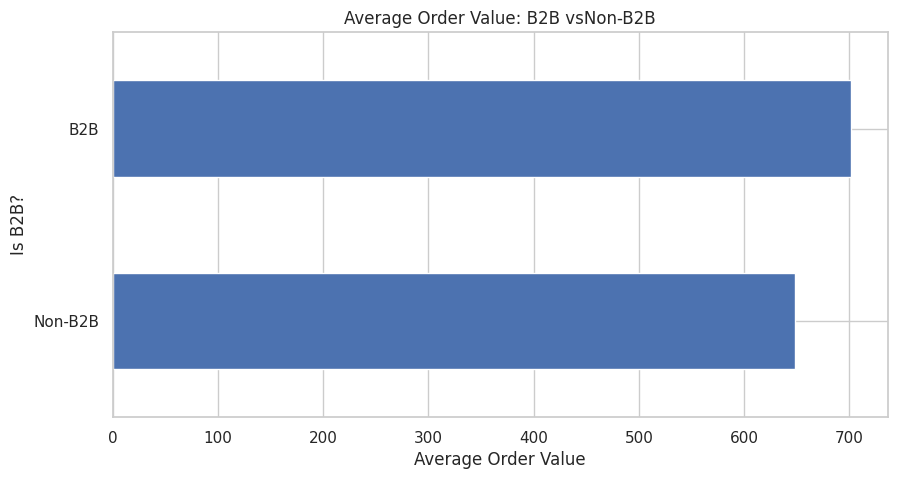

In [99]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
b2b_order_value = df.groupby('b2b')['amount'].mean()
plt.figure(figsize=(10, 5))
b2b_order_value.plot(kind='barh', title='Average Order Value: B2B vsNon-B2B')
plt.ylabel('Is B2B?')
plt.xlabel('Average Order Value')
plt.yticks([0, 1], ['Non-B2B', 'B2B'])
plt.show()

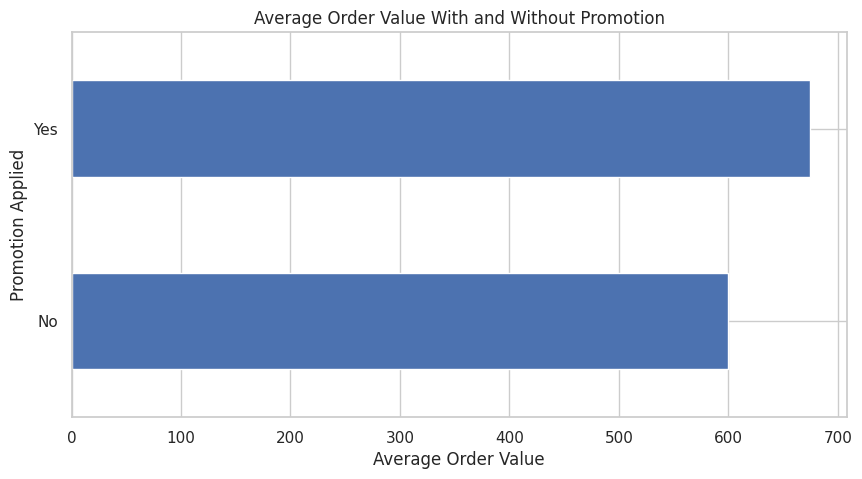

In [100]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")

df['promotion_applied'] = df['promotion_ids'] != 'No Promotion'

promotion_order_value = df.groupby('promotion_applied') ['amount'].mean()

plt.figure(figsize=(10, 5))
promotion_order_value.plot(kind='barh', title='Average Order Value With and Without Promotion')
plt.ylabel('Promotion Applied')
plt.xlabel('Average Order Value')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

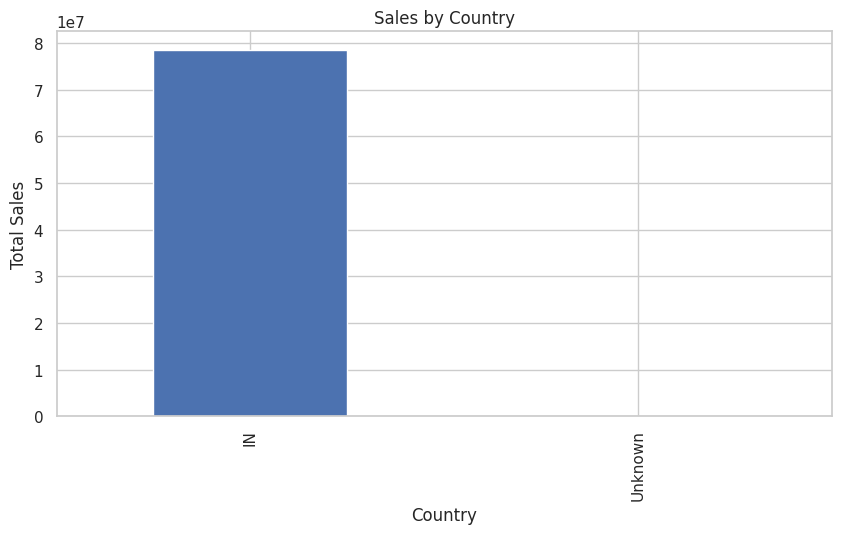

In [101]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
# Grouping data by 'ship_country' and summarizing the total 'amount'
country_sales = df.groupby('ship_country') ['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
country_sales.plot(kind='bar', title='Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


              order id  average_transaction_amount  purchase_frequency    CLV
0  171-0013919-1772325                       405.0                   1  405.0
1  171-0022483-5361108                       518.0                   1  518.0
2  171-0042571-2926720                       352.0                   1  352.0
3  171-0064169-5023569                       771.0                   1  771.0
4  171-0085140-6937160                       495.0                   1  495.0


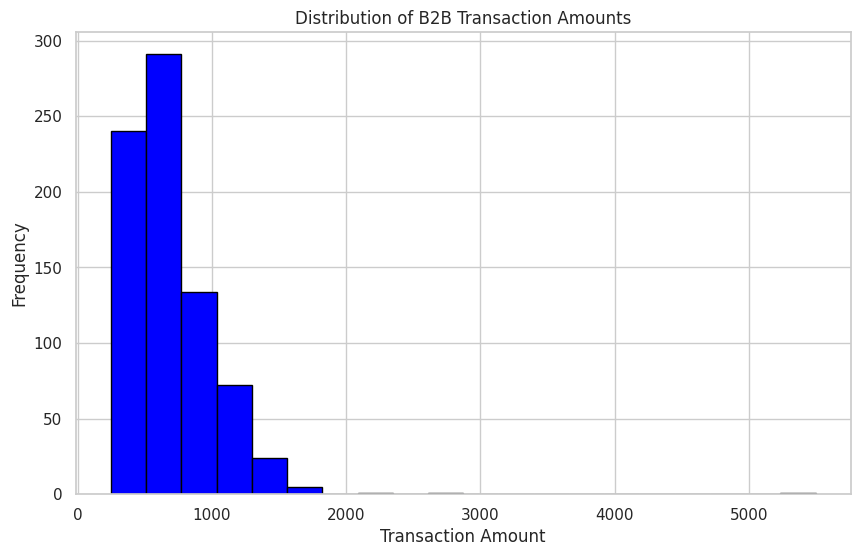

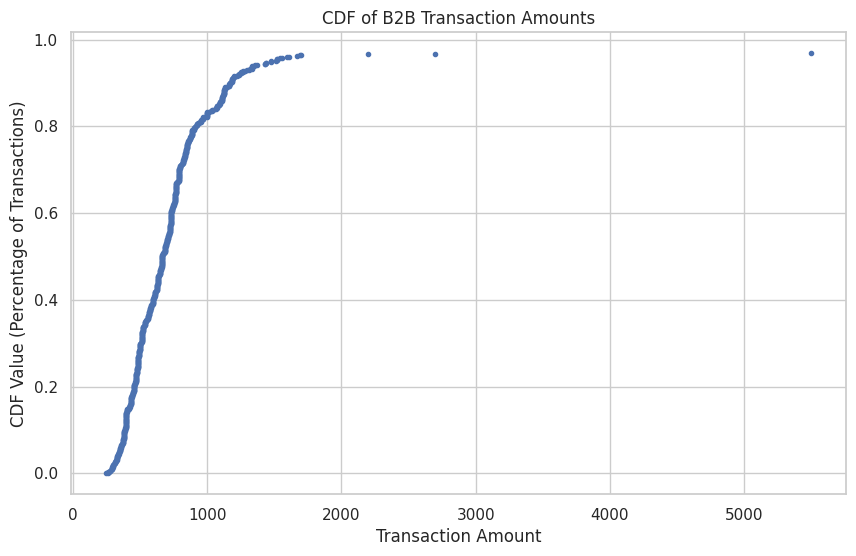

In [102]:
df = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")
b2b_data = df[df['b2b']]

average_transaction_amount = b2b_data.groupby('order id') ['amount'].mean().reset_index()
average_transaction_amount.columns = ['order id', 'average_transaction_amount']

purchase_frequency = b2b_data.groupby('order id').size().reset_index()
purchase_frequency.columns = ['order id', 'purchase_frequency']

clv_data = pd.merge(average_transaction_amount, purchase_frequency, on='order id')

clv_data['CLV'] = clv_data['average_transaction_amount'] * clv_data['purchase_frequency']

print(clv_data.head())

transaction_amounts = clv_data['average_transaction_amount'].tolist()

plt.figure(figsize=(10, 6))
plt.hist(transaction_amounts, bins=20, color='blue',
edgecolor='black')
plt.title('Distribution of B2B Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

transaction_amounts = clv_data['average_transaction_amount'].tolist()

transaction_amounts_sorted = np.sort(transaction_amounts)
cdf_values = np.arange(len(transaction_amounts_sorted)) / float(len(transaction_amounts_sorted) - 1)

plt.figure(figsize=(10, 6))
plt.plot(transaction_amounts_sorted, cdf_values, marker='.',linestyle='none')
plt.title('CDF of B2B Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('CDF Value (Percentage of Transactions)')
plt.grid(True)
plt.show()

In [103]:
df['customer_id'] = df['ship_city'].astype(str) + '_' + df['ship_postal_code'].astype(str)
df['date'] = pd.to_datetime(df['date'])

# Now, we should group by 'customer_id' and 'date' to get the unique transactions per customer
repeat_purchase_frequency = df.groupby('customer_id') ['date'].nunique().reset_index()
# Renaming the columns for clarity
repeat_purchase_frequency.columns = ['customer_id','unique_purchase_dates']
# Sorting the DataFrame based on the 'unique_purchase_dates' to see customers with the most repeat purchases
repeat_purchase_frequency = repeat_purchase_frequency.sort_values('unique_purchase_dates', ascending=False)
print(repeat_purchase_frequency.head())

              customer_id  unique_purchase_dates
1620   BENGALURU_560100.0                     91
1596   BENGALURU_560076.0                     90
5344    GURUGRAM_122001.0                     90
11288      NOIDA_201301.0                     89
1557   BENGALURU_560037.0                     89


category
Set              833.385571
Saree            799.572645
Western Dress    762.790580
Ethnic Dress     723.895389
Top              526.098603
Blouse           520.327106
kurta            455.927108
Bottom           358.733286
Dupatta          305.000000
Name: amount, dtype: float64


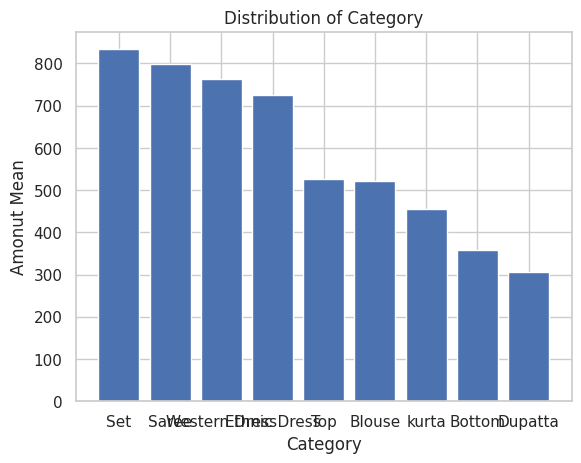

In [104]:
# Binning Numerical Columns to Create a Categorical Column

# Creating bins for Amount
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df['AmountBin'] = pd.cut(df['amount'], bins=bins, labels=slot)

df.head()

# compute the Sum of Amount for Each Category
category_mean = df.groupby("category")["amount"].mean().sort_values(ascending=False)
print(category_mean)

plt.bar(category_mean.index, category_mean.values)

plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Amonut Mean')
plt.show()

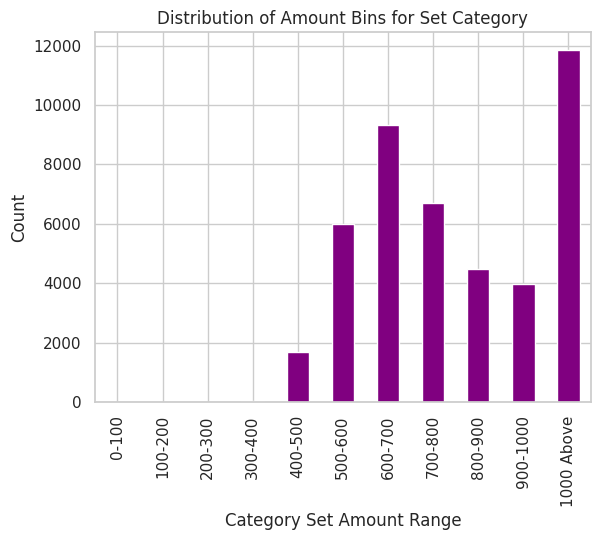

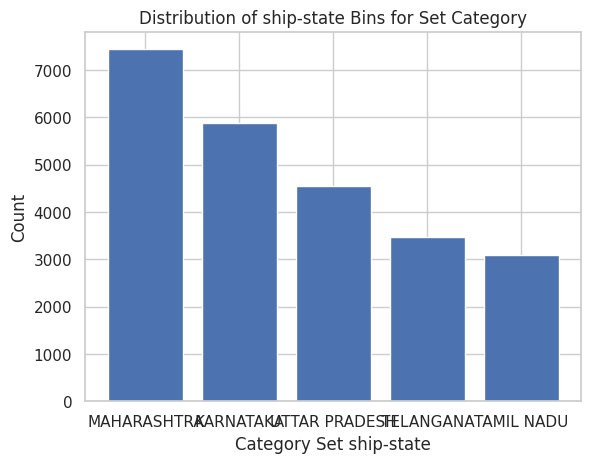

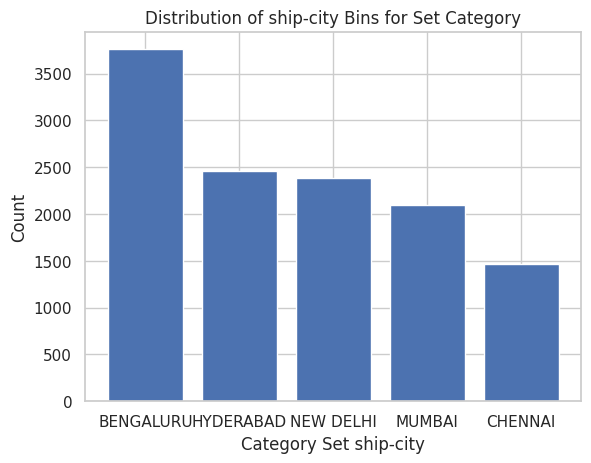

In [105]:
# Filter dataframe to include only rows where 'Category' is 'Set'
df_Set = df[df['category'] == 'Set' ]
df_Set = df_Set[df_Set['qty'] > 0 ]

# Creating bins for Category Amount
bins_Set = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Set = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Set['CategoryBin'] = pd.cut(df_Set['amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Set['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Set Category')
plt.xlabel('Category Set Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Set["ship_state"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Set Category')
plt.xlabel('Category Set ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Set["ship_city"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Set Category')
plt.xlabel('Category Set ship-city')
plt.ylabel('Count')
plt.show()

## Market basket analysis

In [114]:
!pip install pyfpgrowth
import pyfpgrowth

# Preparing the transactions data as a list of lists
transactions = df.groupby('order id')['sku'].apply(lambda x: x.tolist()).tolist()
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)
rules = pyfpgrowth.generate_association_rules(patterns, 0.2)
# Printing out the rules
for rule in rules:
    print(rule, "=>", rules[rule])

('BL107-M',) => (('J0348-SET-L',), 1.0)
('SET225-KR-NP-XXXL',) => (('SET289-KR-NP-XXXL',), 1.0)
('SET289-KR-NP-XXXL',) => (('SET225-KR-NP-XXXL',), 0.25)
('JNE3413-KR-XXXL',) => (('JNE3788-KR-XXXL',), 1.0)
('JNE3788-KR-XXXL',) => (('JNE3413-KR-XXXL',), 0.6666666666666666)
('JNE3899-KR-A-M',) => (('JNE3908-KR-M',), 1.0)
('JNE3908-KR-M',) => (('JNE3899-KR-A-M',), 0.4)
('NW036-ST-SR-XXL',) => (('NW020-ST-SR-XXL',), 0.6666666666666666)
('SAR135',) => (('SAR137',), 0.6666666666666666)
('SAR137',) => (('SAR135',), 0.3333333333333333)
('CH208-MUSTARD-L',) => (('JNE3701-KR-XL',), 0.6666666666666666)
('SET306-KR-PP-XS',) => (('SET308-KR-PP-XS',), 0.5)
('SET308-KR-PP-XS',) => (('SET306-KR-PP-XS',), 0.6666666666666666)
('J0077-SKD-XXXL',) => (('J0236-SKD-XXXL',), 0.6666666666666666)
('J0278-SET-XXL',) => (('SET268-KR-NP-XXL',), 0.6666666666666666)
('JNE3475-KR-K-XXL',) => (('JNE3431-KR-XXL',), 0.6666666666666666)
('JNE3425-KR-XXXL',) => (('JNE3376-KR-XXXL', 'JNE3463-KR-XXXL', 'JNE3468-KR-XXXL', 'J

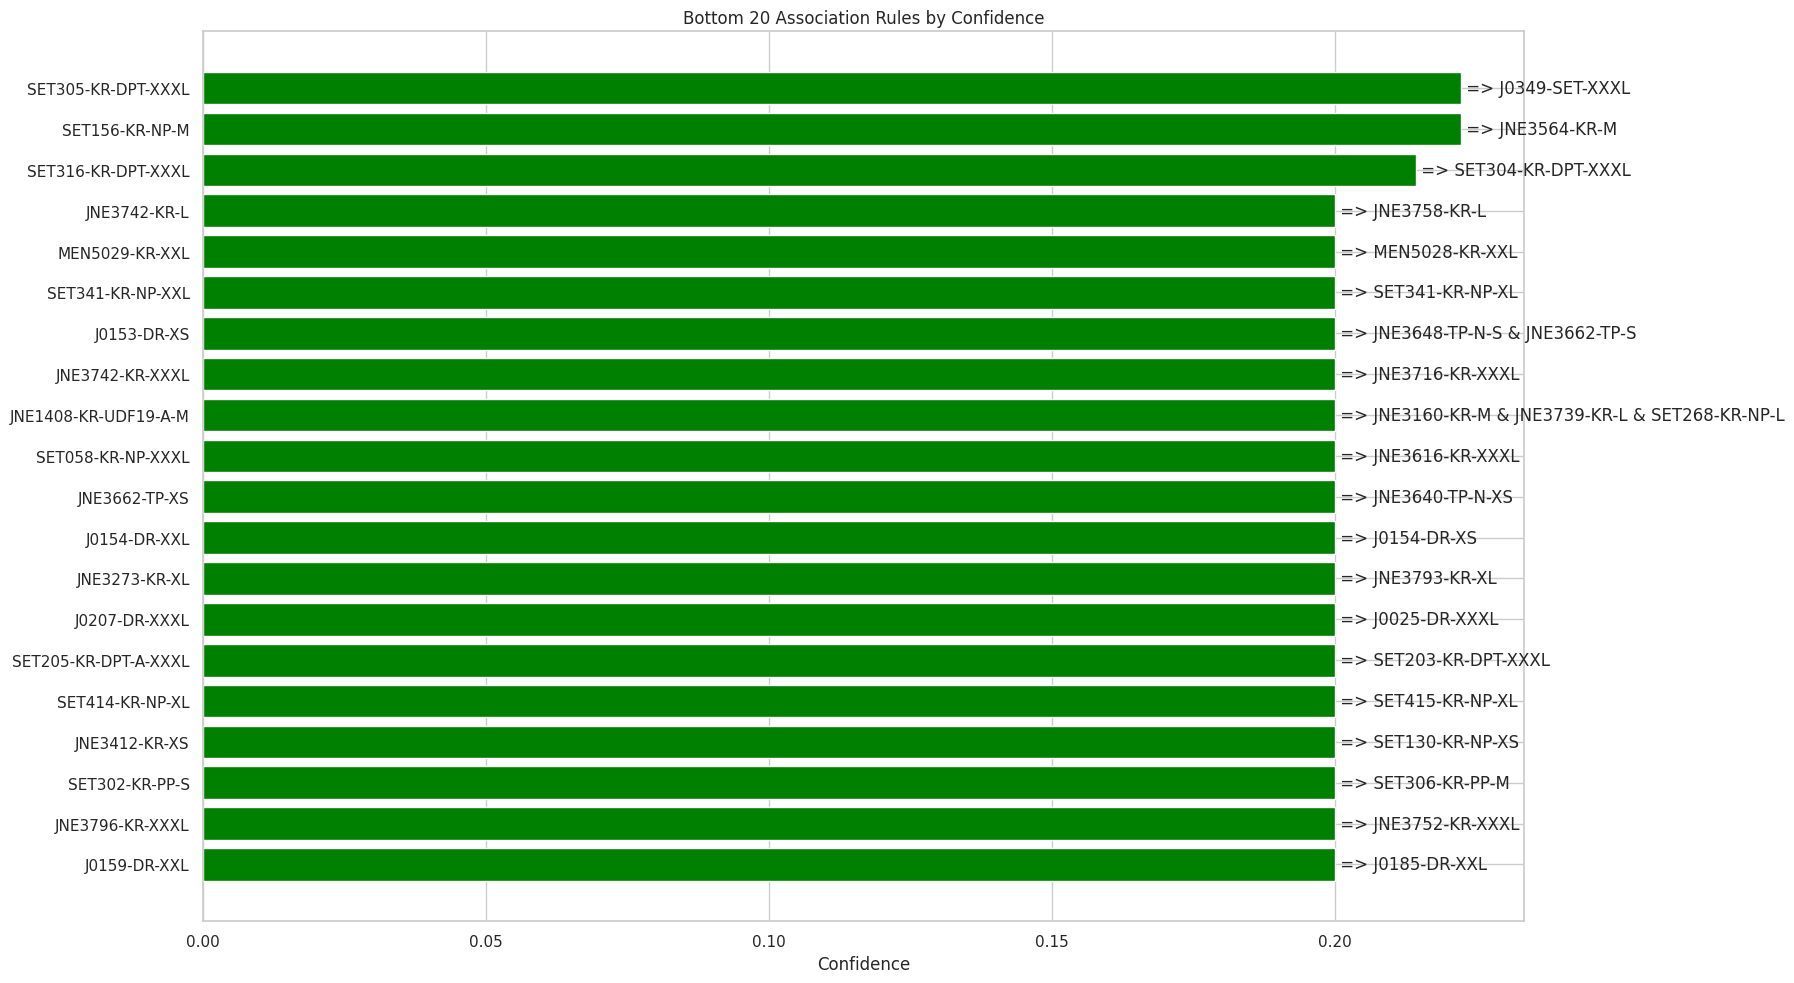

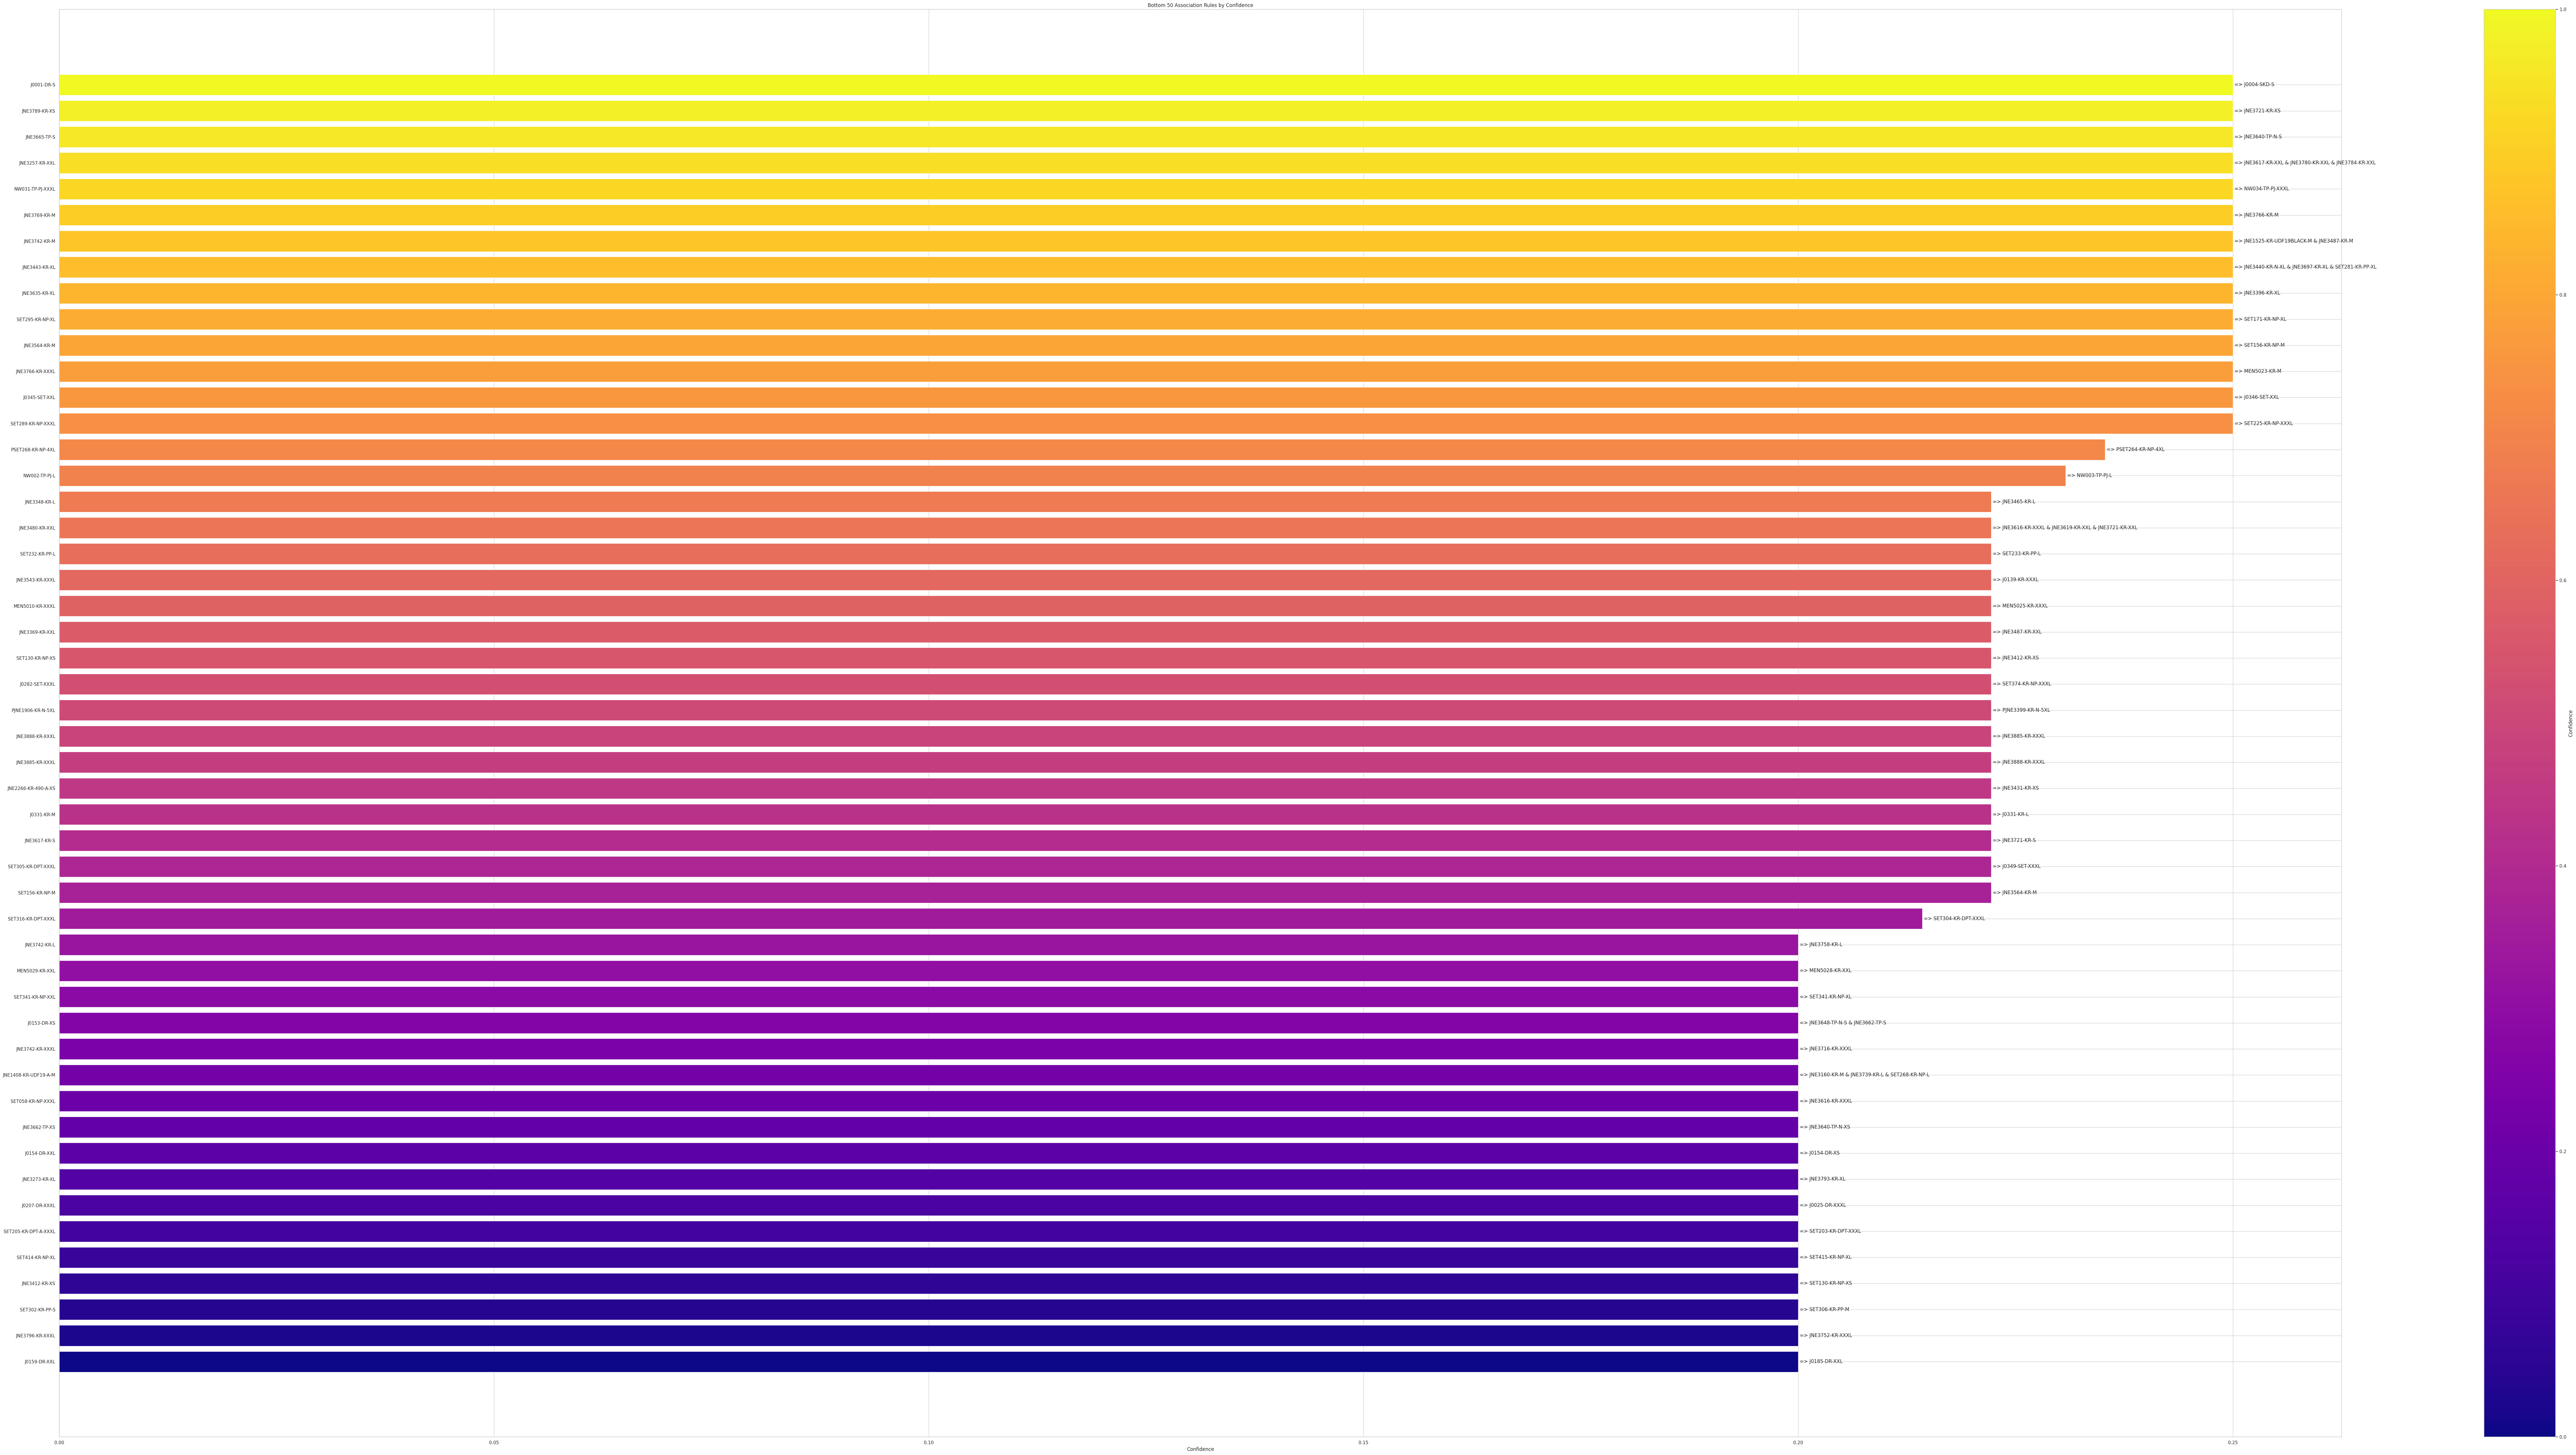

In [115]:

# Extracting rules and their confidence
rules_with_confidence = [(rule, rules[rule][0], rules[rule][1]) for rule in rules]
rules_with_confidence.sort(key=lambda x: x[2])
top_rules = rules_with_confidence[:20]

# Separating the antecedents, consequents, and confidence for plotting
antecedents = [' & '.join(rule[0]) for rule in top_rules]
consequents = [' & '.join(rule[1]) for rule in top_rules]

confidences = [rule[2] for rule in top_rules]
fig, ax = plt.subplots(figsize=(18, 10))
ax.barh(antecedents, confidences, color='green')

for i, (antecedent, consequent) in enumerate(zip(antecedents, consequents)):
    plt.text(confidences[i], i, f' => {consequent}', va='center')

ax.set_xlabel('Confidence')
ax.set_title('Bottom 20 Association Rules by Confidence')

plt.tight_layout()
plt.show()


# Extracting rules and their confidence
rules_with_confidence = [(rule, rules[rule][0], rules[rule][1]) for rule in rules]
rules_with_confidence.sort(key=lambda x: x[2])  # Sort in ascending order
bottom_rules = rules_with_confidence[:50]


antecedents_bottom = [' & '.join(rule[0]) for rule in bottom_rules]
consequents_bottom = [' & '.join(rule[1]) for rule in bottom_rules]
confidences_bottom = [rule[2] for rule in bottom_rules]


colors = plt.cm.plasma(np.linspace(0, 1, len(antecedents_bottom)))

fig, ax = plt.subplots(figsize=(100, 50))
bars = ax.barh(antecedents_bottom, confidences_bottom, color=colors)

for bar, (antecedent, consequent) in zip(bars, zip(antecedents_bottom, consequents_bottom)):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f' => {consequent}', va='center')

ax.set_xlabel('Confidence')
ax.set_title('Bottom 50 Association Rules by Confidence')


cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=ax)
cbar.set_label('Confidence')

plt.tight_layout()
plt.show()


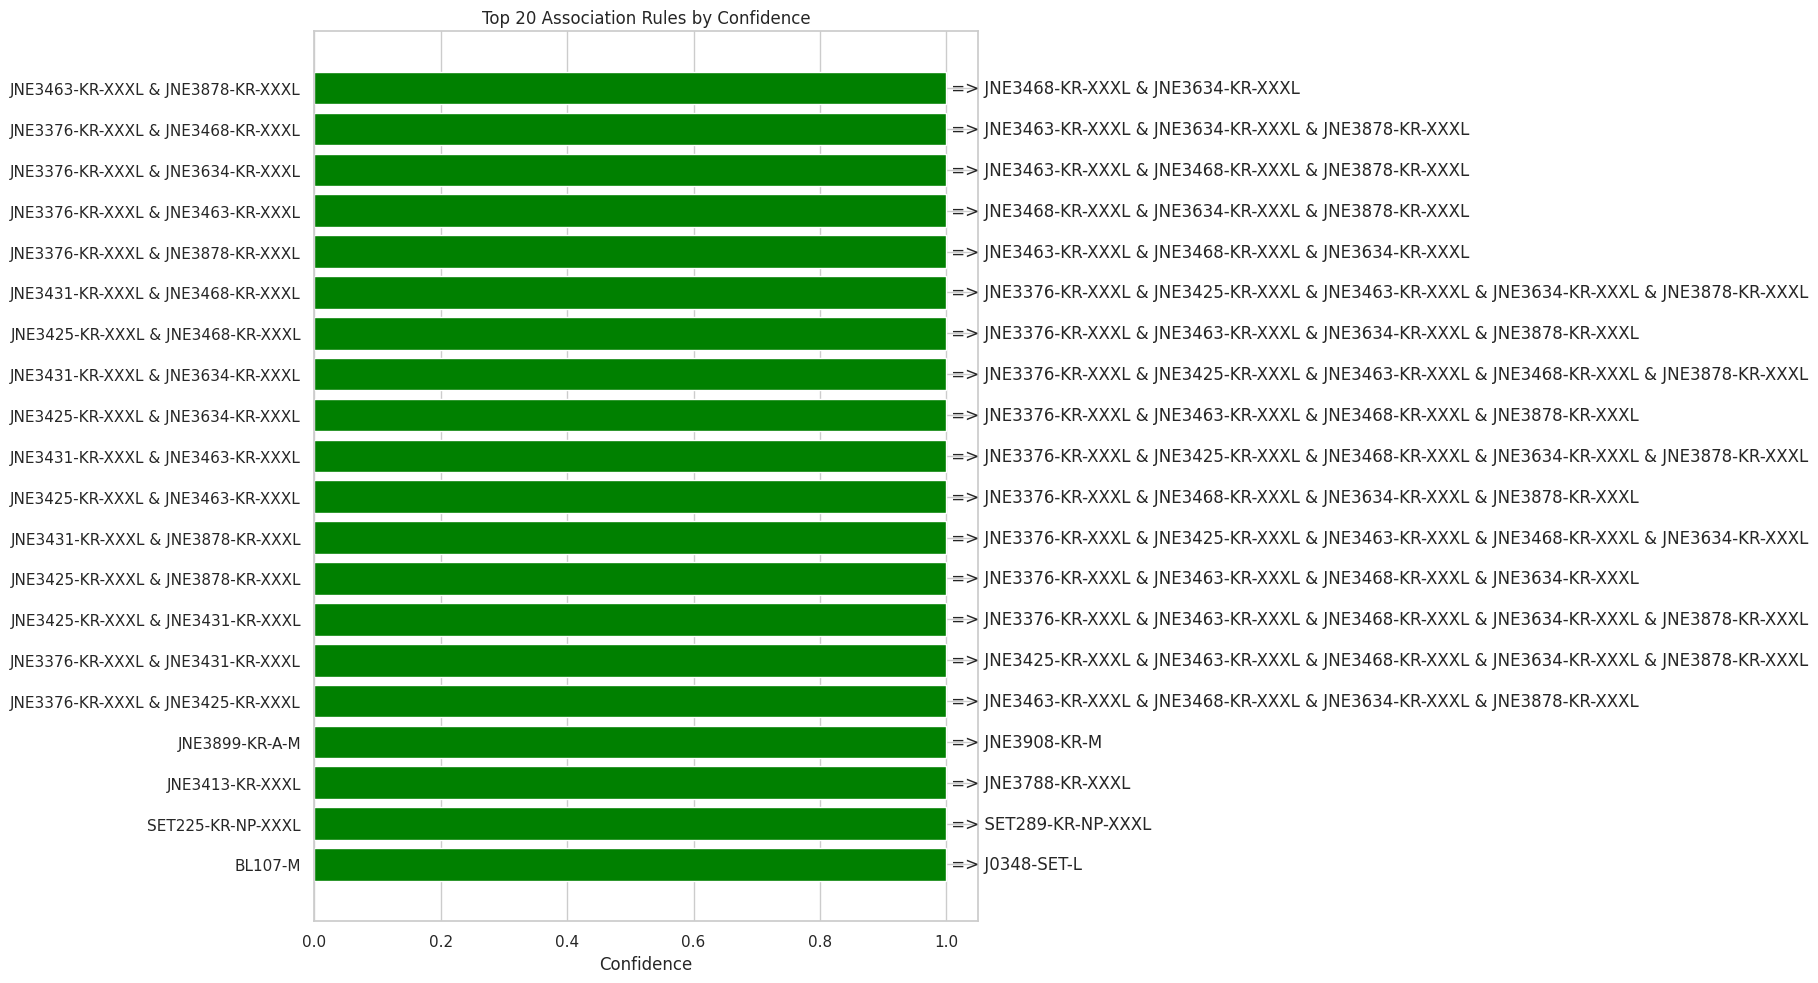

In [116]:

# Extracting rules and their confidence
rules_with_confidence = [(rule, rules[rule][0], rules[rule][1]) for rule in rules]
rules_with_confidence.sort(key=lambda x: x[2], reverse = True)
top_rules = rules_with_confidence[:20]

# Separating the antecedents, consequents, and confidence for plotting
antecedents = [' & '.join(rule[0]) for rule in top_rules]
consequents = [' & '.join(rule[1]) for rule in top_rules]

confidences = [rule[2] for rule in top_rules]
fig, ax = plt.subplots(figsize=(18, 10))
ax.barh(antecedents, confidences, color='green')

for i, (antecedent, consequent) in enumerate(zip(antecedents, consequents)):
    plt.text(confidences[i], i, f' => {consequent}', va='center')

ax.set_xlabel('Confidence')
ax.set_title('Top 20 Association Rules by Confidence')
plt.tight_layout()
plt.show()

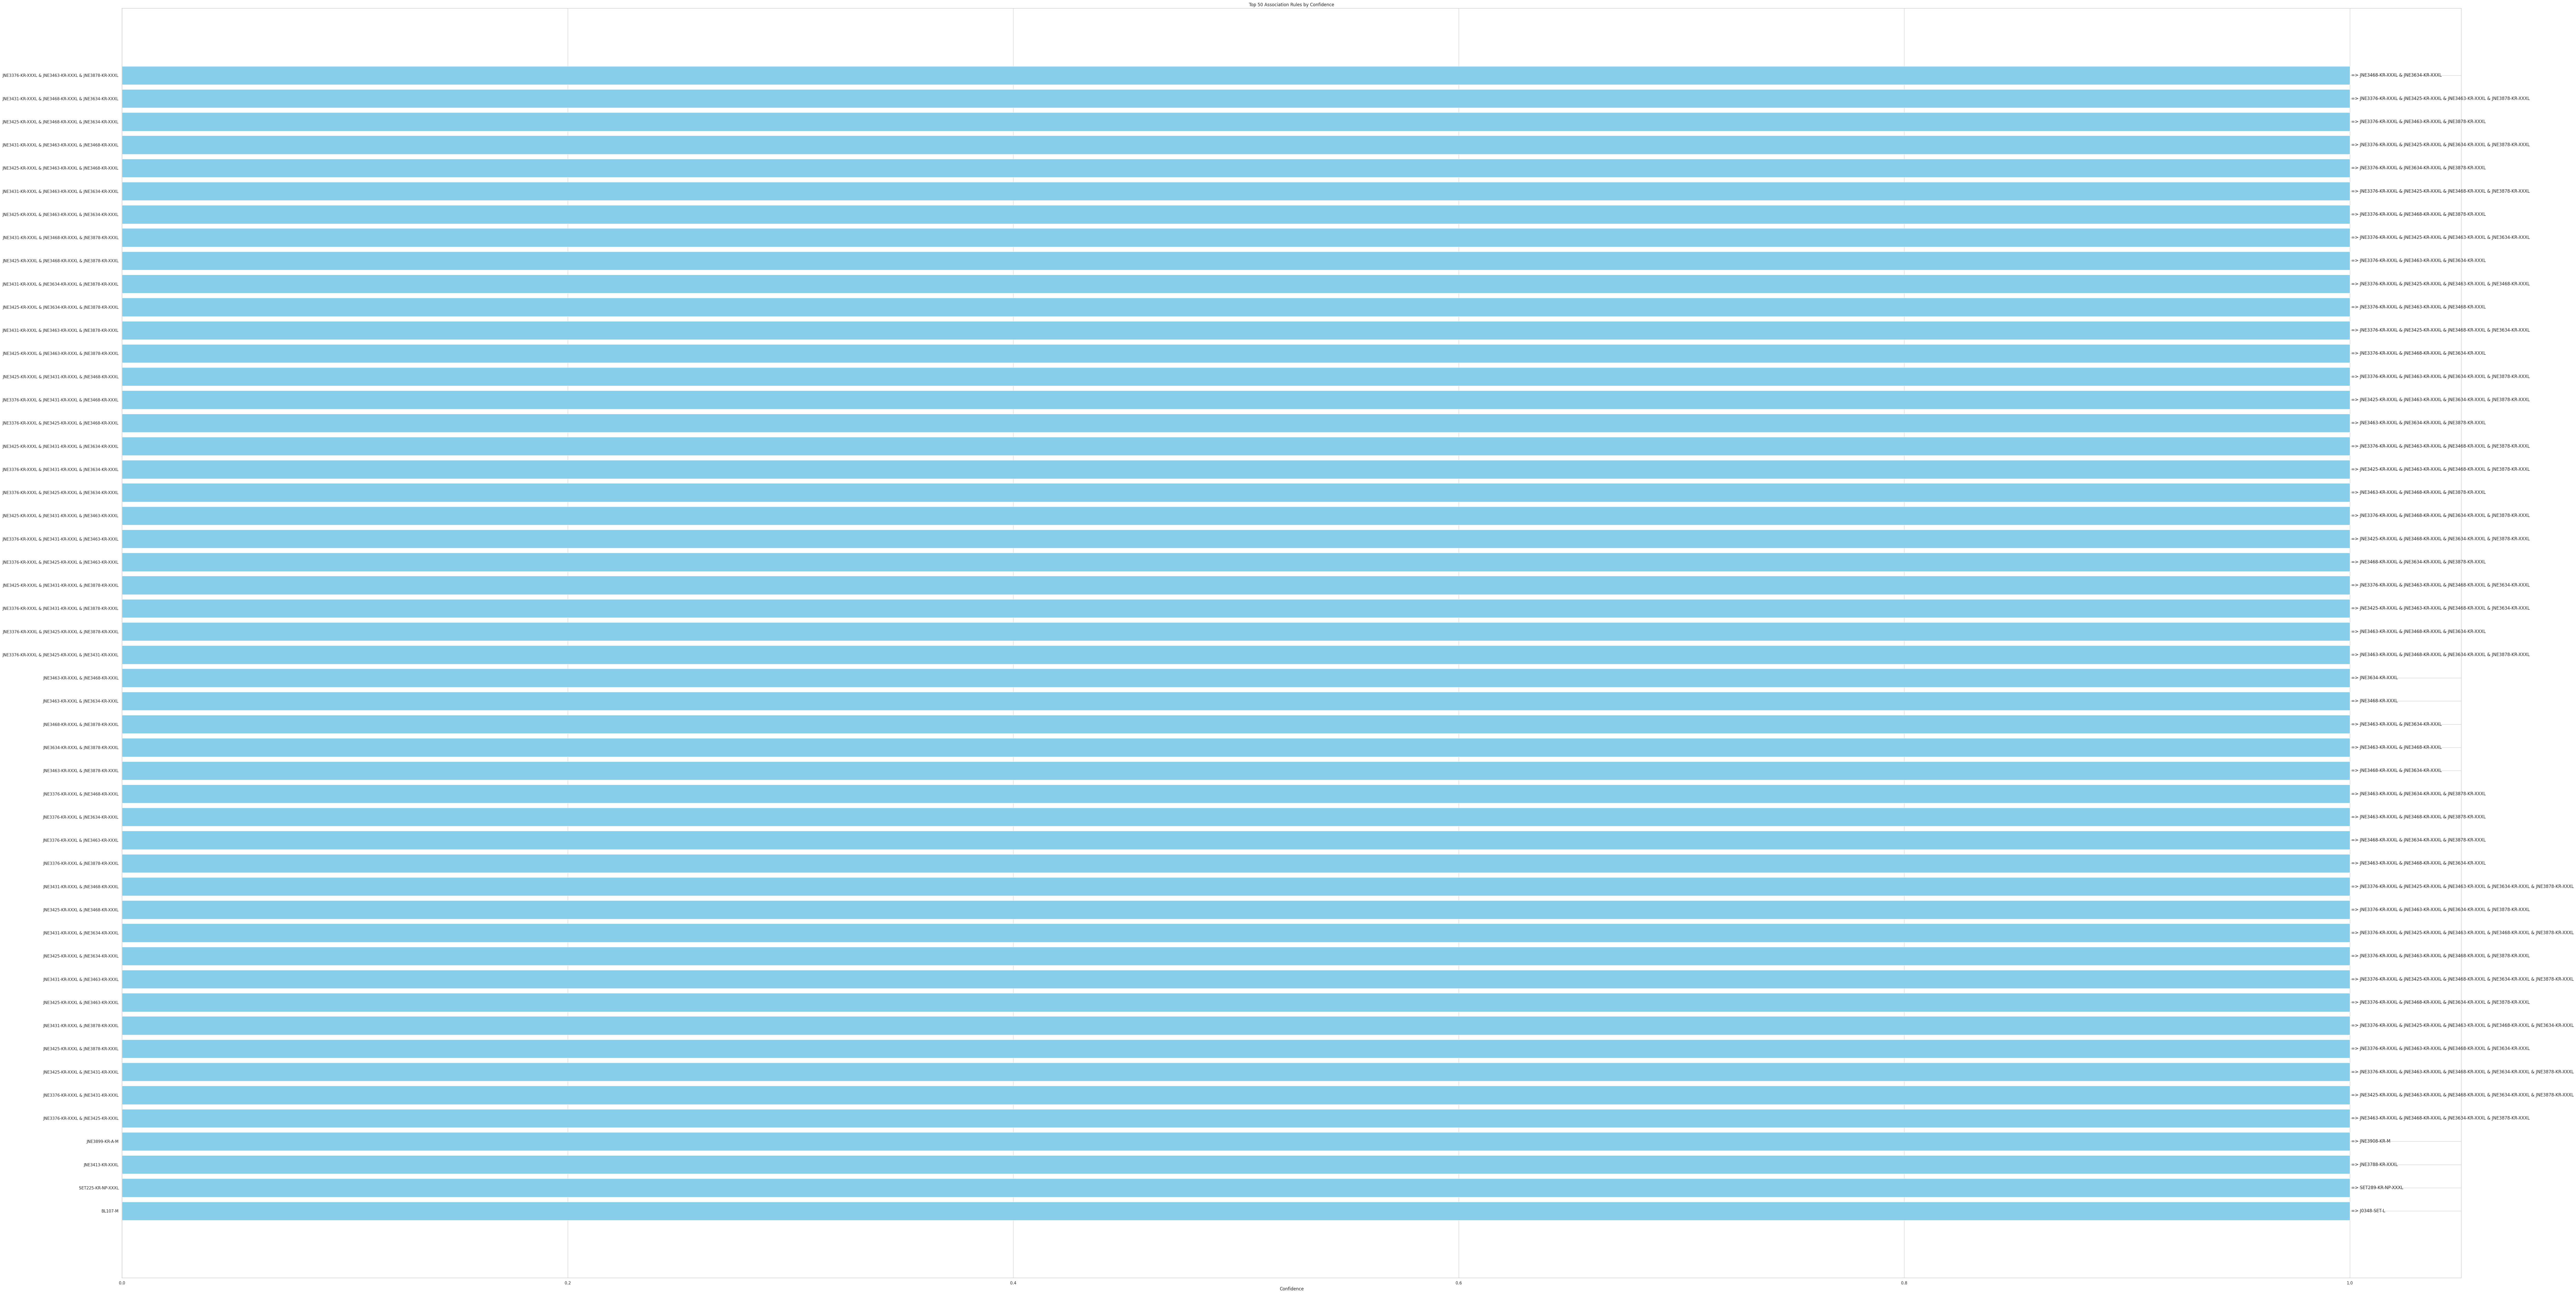

In [117]:

# Extracting rules and their confidence
rules_with_confidence = [(rule, rules[rule][0], rules[rule][1]) for rule in rules]
rules_with_confidence.sort(key=lambda x: x[2], reverse = True)
top_rules = rules_with_confidence[:50]

# Separating the antecedents, consequents, and confidence for plotting
antecedents = [' & '.join(rule[0]) for rule in top_rules]
consequents = [' & '.join(rule[1]) for rule in top_rules]

confidences = [rule[2] for rule in top_rules]
fig, ax = plt.subplots(figsize=(100, 50))
ax.barh(antecedents, confidences, color='skyblue')

for i, (antecedent, consequent) in enumerate(zip(antecedents, consequents)):
    plt.text(confidences[i], i, f' => {consequent}', va='center')

ax.set_xlabel('Confidence')
ax.set_title('Top 50 Association Rules by Confidence')
plt.tight_layout()
plt.show()

# International Report

In [118]:
# replace '-' with '_' and lowercase all column names
pdf6 = pd.read_csv("International_sale_Report.csv")
pdf6.columns = [col.lower() for col in pdf6.columns]

# save
pdf6.to_csv("standardized_International_sale_Report.csv", index=False)


## Missing values

<Axes: >

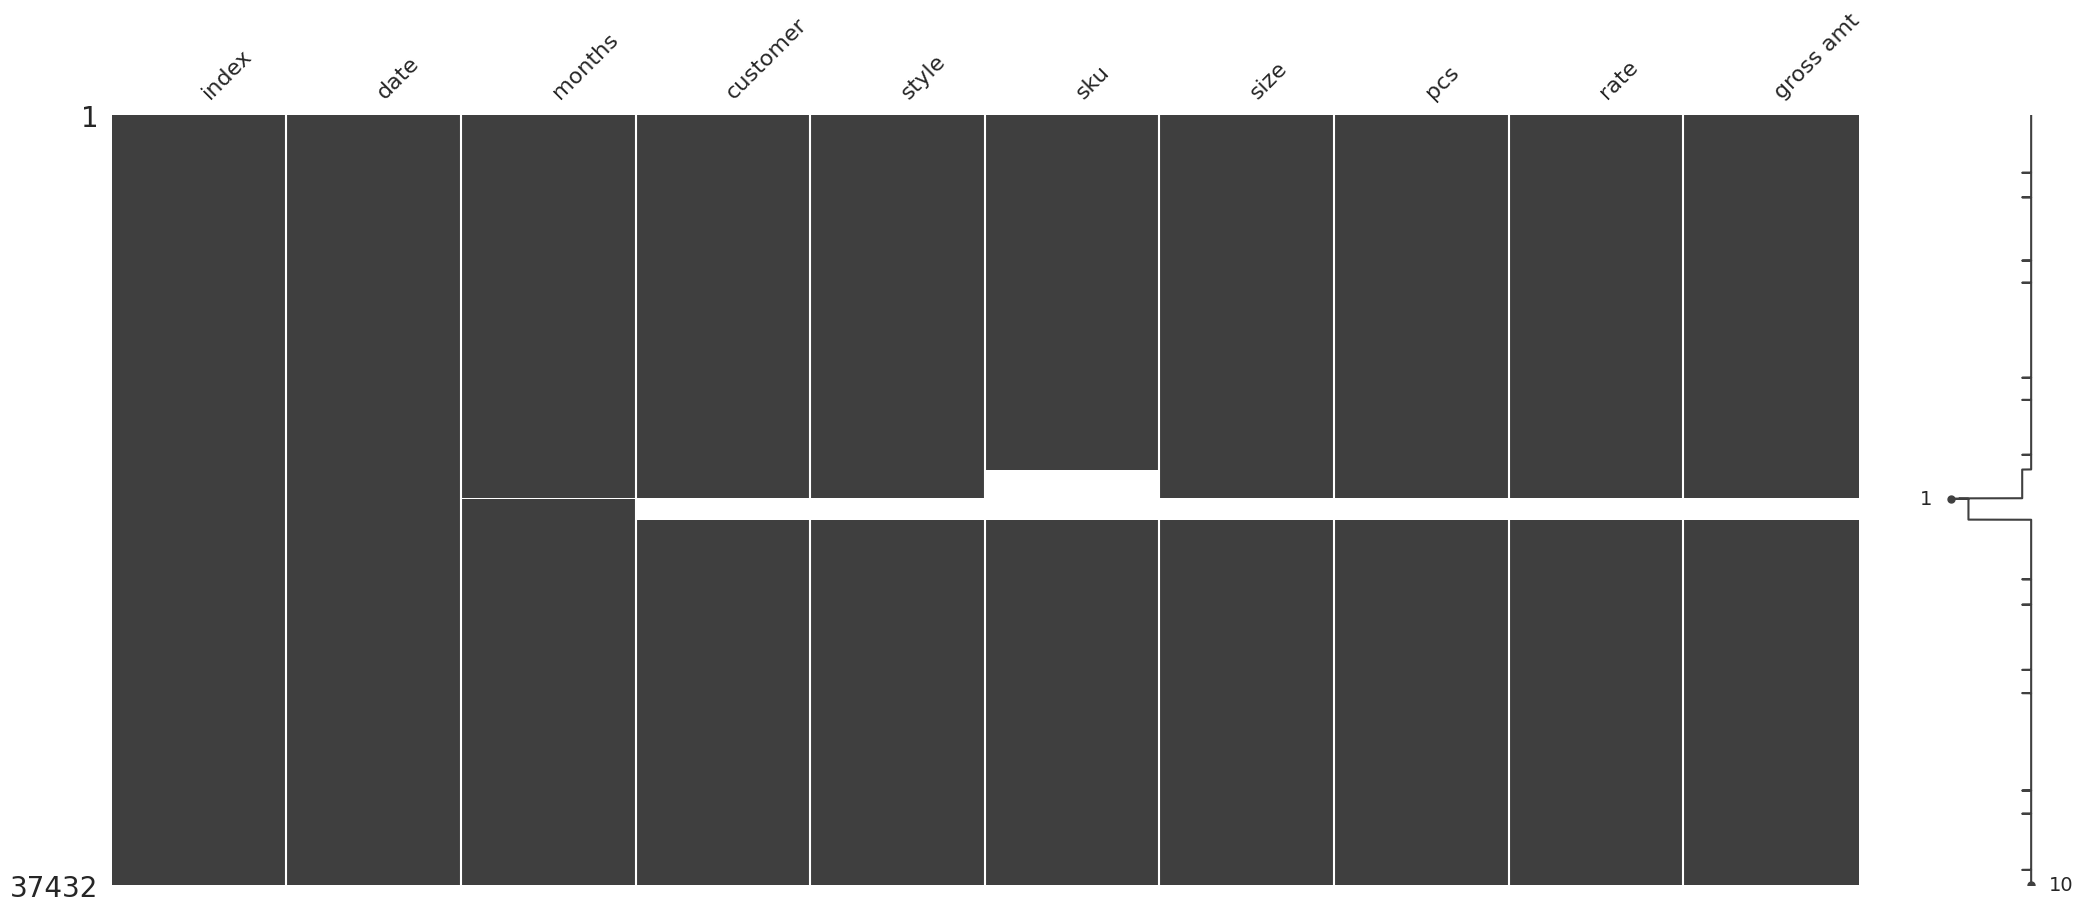

In [119]:
import missingno as mn
pdf = pd.read_csv("standardized_International_sale_Report.csv")
mn.matrix(pdf)


index        0.00
date         0.00
months       0.07
customer     2.78
style        2.78
sku          6.61
size         2.78
pcs          2.78
rate         2.78
gross amt    2.78
dtype: float64


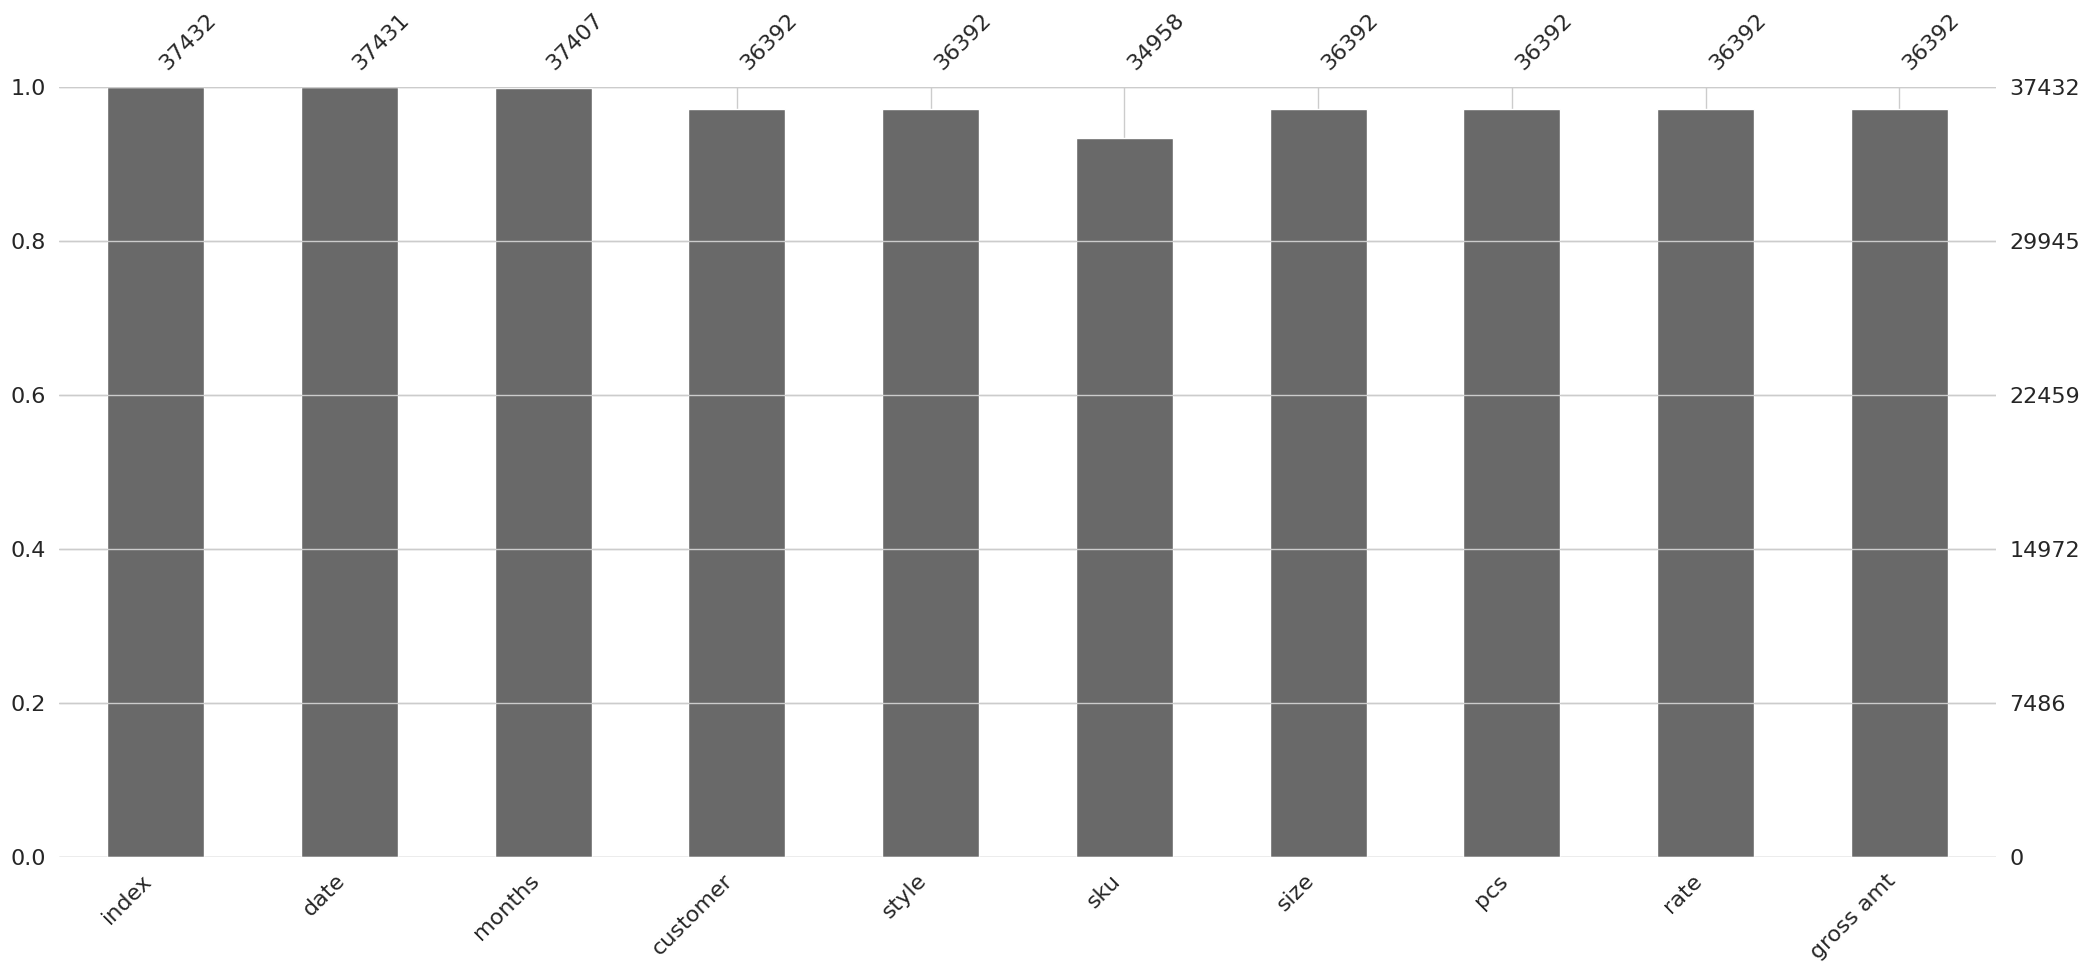

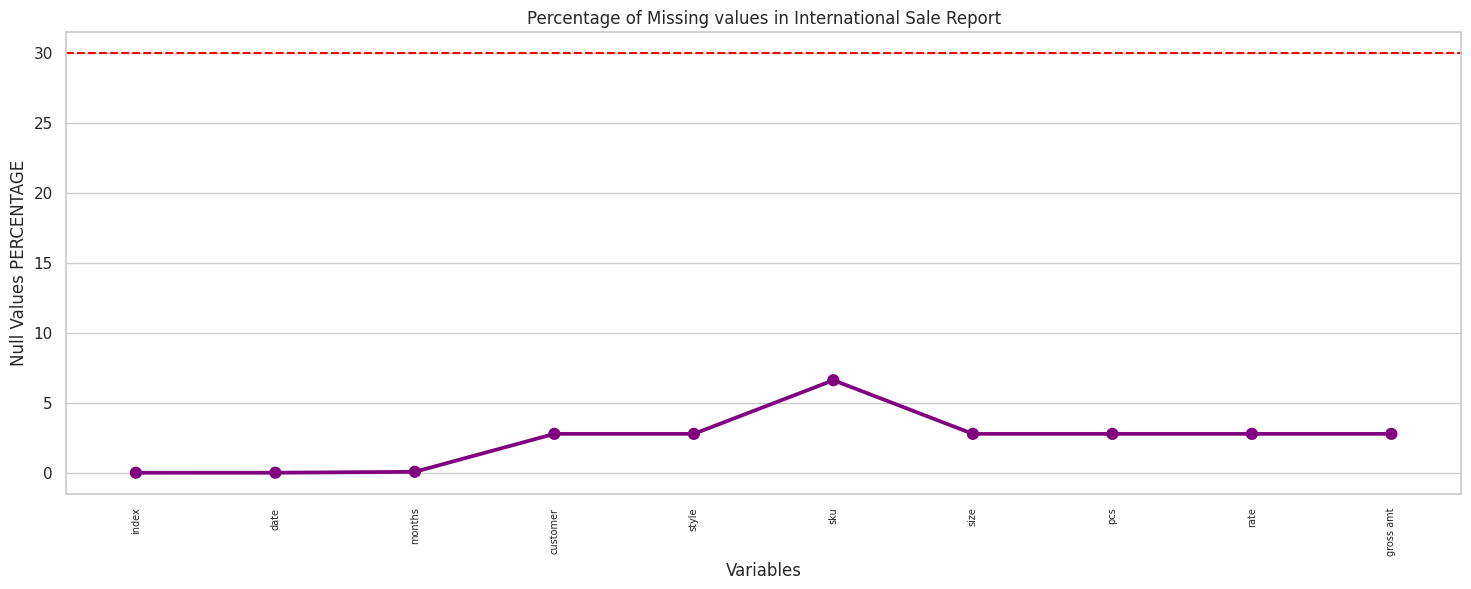

Missing Values in Each Column:
index           0
date            1
months         25
customer     1040
style        1040
sku          2474
size         1040
pcs          1040
rate         1040
gross amt    1040
dtype: int64


In [120]:
import seaborn as sns
mn.bar(pdf)
# calculate Percentage of Null Value in Each Column
print(round(pdf.isnull().sum() / pdf.shape[0] * 100.00,2))
clean_percent = 30

# calculate null values percentage
null_df_file = pd.DataFrame((pdf.isnull().sum())*100/pdf.shape[0]).reset_index()
# create a DataFrame with Columns "column name" and "null values percentage":
null_df_file.columns = ['column name', 'null values percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="column name",y="null values percentage",data=null_df_file,color='purple')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(clean_percent, ls='--',color='red')
plt.title("Percentage of Missing values in International Sale Report")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("Variables")
plt.show()

# total missing values
missing_values = pdf.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


In [121]:
# look for the count of unique values of each column to understand the dataset
for col in pdf.columns:
    print("Column:",col, "\n\n", pdf[col].value_counts(),"\n")

Column: index 

 0        1
24966    1
24950    1
24951    1
24952    1
        ..
12478    1
12479    1
12480    1
12481    1
37431    1
Name: index, Length: 37432, dtype: int64 

Column: date 

 MULBERRIES BOUTIQUE    1904
09-14-21                700
COTTON CLOSET LTD       659
07-09-21                657
03-03-22                657
                       ... 
JNE3553                   1
JNE3546                   1
JNE3622                   1
JNE3516                   1
JNE3507                   1
Name: date, Length: 1326, dtype: int64 

Column: months 

 Feb-22    3380
Oct-21    3098
Mar-22    2263
Nov-21    1816
Sep-21    1497
          ... 
233.00       1
874.00       1
189.00       1
568.00       1
151.00       1
Name: months, Length: 571, dtype: int64 

Column: customer 

 Feb-22                    3448
Oct-21                    3176
Mar-22                    2327
MULBERRIES BOUTIQUE       2121
Nov-21                    1882
                          ... 
MONIYSHAA              

## Clean Data

In [122]:

imputation = pdf.fillna('Unknown')

# save
imputation.to_csv("cleaned_International_sale_Report.csv", index=False)
pdf = pd.read_csv("cleaned_International_sale_Report.csv")


# total missing values
missing_values = pdf.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
index        0
date         0
months       0
customer     0
style        0
sku          0
size         0
pcs          0
rate         0
gross amt    0
dtype: int64


## Merge Data

In [123]:


df_international = pd.read_csv("cleaned_International_sale_Report.csv")
df_amazon = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8")

# Merge the Two Tables According to SKU Column
df_Merge = df_international.merge(df_amazon[['sku','category']], on='sku', how='left')
df_Merge = df_Merge.drop_duplicates(subset=['index'])
df_Merge = df_Merge.dropna(subset=['category'])

# Discarding Useless Data
df_Merge = df_Merge.drop(['index', 'date','sku'], axis=1)

df_Merge.to_csv("Merged_Report.csv", index=False)
dfm = pd.read_csv("Merged_Report.csv")
headers = dfm.columns.tolist()
print("Headers:", headers)
dfm.info()

Headers: ['months', 'customer', 'style', 'size', 'pcs', 'rate', 'gross amt', 'category']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276 entries, 0 to 28275
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   months     28276 non-null  object 
 1   customer   28276 non-null  object 
 2   style      28276 non-null  object 
 3   size       28276 non-null  object 
 4   pcs        28276 non-null  float64
 5   rate       28276 non-null  float64
 6   gross amt  28276 non-null  float64
 7   category   28276 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


In [124]:
dfm = pd.read_csv("Merged_Report.csv")

categorical_columns = ['months','customer','style','size','category']

for col in categorical_columns:
    dfm[col] =pd.Categorical(dfm[col])

numerical_columns = ['rate','pcs','gross amt']

# Remove Unumerical Values from Numeric Columns
for col in numerical_columns:
    dfm = dfm[pd.to_numeric(dfm[col], errors='coerce').notnull()]

# Convert the Number to Float Type
for col in numerical_columns:
    dfm[col] = dfm[col].astype(float)

    # Converting Negative Values in Numerical Columns to Positive Values
for col in numerical_columns:
    dfm[col] = abs(dfm[col])
dfm.info()
# capitalize first letter of strings
dfm = dfm.applymap(lambda x: x.title() if type(x) == str else x)
dfm.head()

missing_values = dfm.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
# save
dfm.to_csv("Merged_Report.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28276 entries, 0 to 28275
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   months     28276 non-null  category
 1   customer   28276 non-null  category
 2   style      28276 non-null  category
 3   size       28276 non-null  category
 4   pcs        28276 non-null  float64 
 5   rate       28276 non-null  float64 
 6   gross amt  28276 non-null  float64 
 7   category   28276 non-null  category
dtypes: category(5), float64(3)
memory usage: 1.1 MB
Missing Values in Each Column:
months       0
customer     0
style        0
size         0
pcs          0
rate         0
gross amt    0
category     0
dtype: int64


In [125]:
dfm5 = pd.read_csv("Merged_Report.csv")
# Select the categorical columns to create dummies for
categorical_columns = ['months', 'customer', 'style', 'size']
dfm5 = pd.get_dummies(dfm5, columns=categorical_columns)


# Display the first 5 rows o0f the DataFrame along with headers
print(dfm5.head())



   pcs    rate  gross amt category  months_01-01-22  months_01-04-22  \
0  1.0  616.56      617.0    Kurta                0                0   
1  1.0  616.56      617.0    Kurta                0                0   
2  1.0  616.56      617.0    Kurta                0                0   
3  1.0  616.56      617.0    Kurta                0                0   
4  1.0  616.56      617.0    Kurta                0                0   

   months_01-05-22  months_01-10-22  months_01-12-22  months_01-13-22  ...  \
0                0                0                0                0  ...   
1                0                0                0                0  ...   
2                0                0                0                0  ...   
3                0                0                0                0  ...   
4                0                0                0                0  ...   

   size_8.00  size_9.00  size_Free  size_L  size_M  size_S  size_Xl  size_Xs  \
0          0      

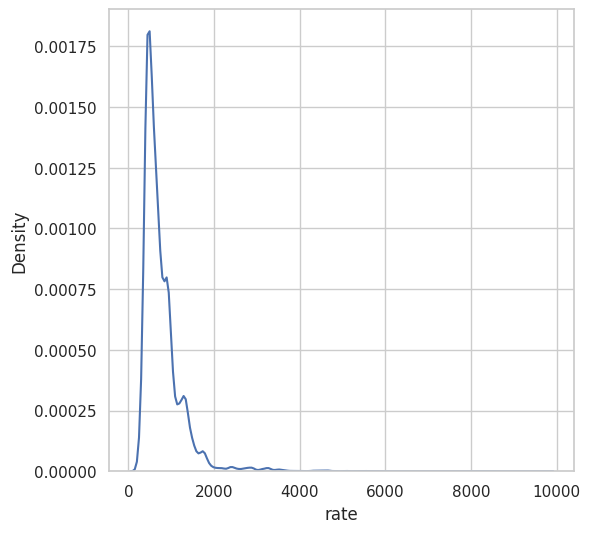

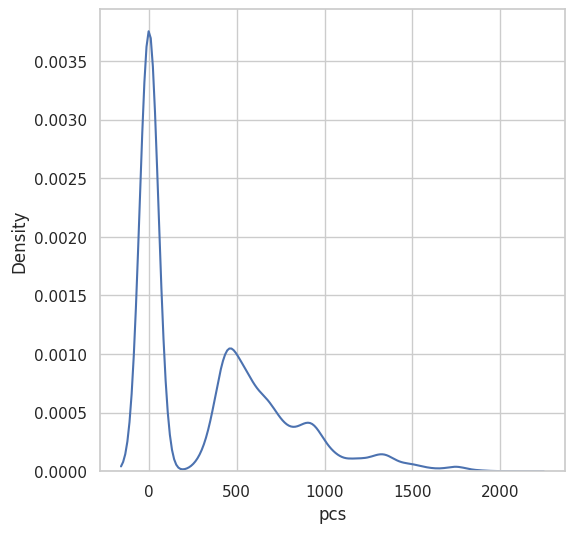

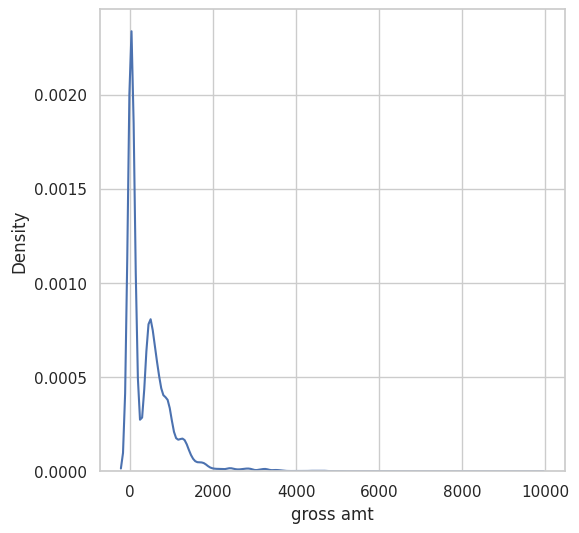

In [126]:
dfm = pd.read_csv("Merged_Report.csv")
# Check Outlier in RATE column
plt.figure(figsize=(6,6))
sns.kdeplot(dfm['rate'])
plt.show()

# Check Outlier in PCS column
plt.figure(figsize=(6,6))
sns.kdeplot(dfm['pcs'])
plt.show()

# Check Outlier in GROSS AMT column
plt.figure(figsize=(6,6))
sns.kdeplot(dfm['gross amt'])
plt.show()

## Visualisations

customer
Mulberries Boutique                   1458958.0
Amani Concept Trading Llc (Kapda)      753165.0
Galaxy Group Of Companies Pvt. Ltd     378984.0
Rivaan Llc                             371163.0
Vaharsha Boutique                      364594.0
                                        ...    
Mr.Alwar Murali                          6038.0
Vahlaarmathy                             5856.0
Akash Kaushal                            5149.0
Shweta                                   4720.0
Kiruthika V Sureshbabu                   2655.0
Name: gross amt, Length: 133, dtype: float64


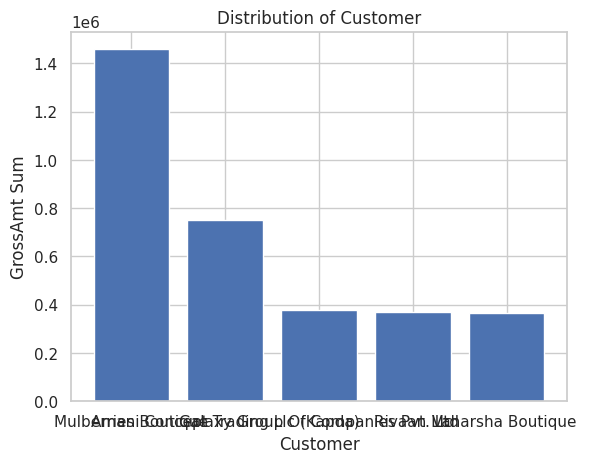

In [127]:
# Binning Numerical Columns to create a categorical column

# Creating bins for GROSS AMT
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, float('inf')]
slot = ['0-200','200-400', '400-600','600-800','800-1000','1000-1200','1200-1400','1400-1600','1600-1800','1800-2000', '2000 Above']

dfm['GrossamtBin'] = pd.cut(dfm['gross amt'], bins=bins, labels=slot)
# Compute the Sum of GROSS AMT for Each CUSTOMER
grossamt_sum = dfm.groupby("customer")["gross amt"].sum().sort_values(ascending=False)

# Display the Result
print(grossamt_sum)

# Filter Out the top 5 Larger CUSTOMER
grossamt_sum_top = grossamt_sum.nlargest(5)

# Draw a Histogram of the GROSS AMT Sum for Each Category
plt.bar(grossamt_sum_top.index, grossamt_sum_top.values)

plt.title('Distribution of Customer')
plt.xlabel('Customer')
plt.ylabel('GrossAmt Sum')
plt.show()

Mulberries Boutique
The Sum of Gross Amt for Category
category
Set              1043930.0
Kurta             265319.0
Western Dress      63525.0
Top                42558.0
Ethnic Dress       37363.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Set              1186.284091
Ethnic Dress      889.595238
Western Dress     825.000000
Kurta             588.290466
Top               545.615385
Name: gross amt, dtype: float64


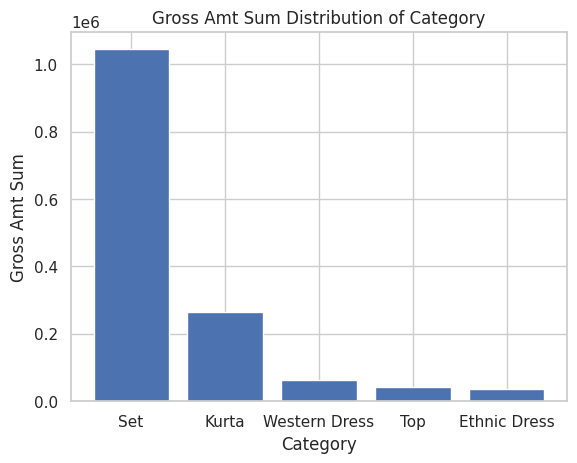

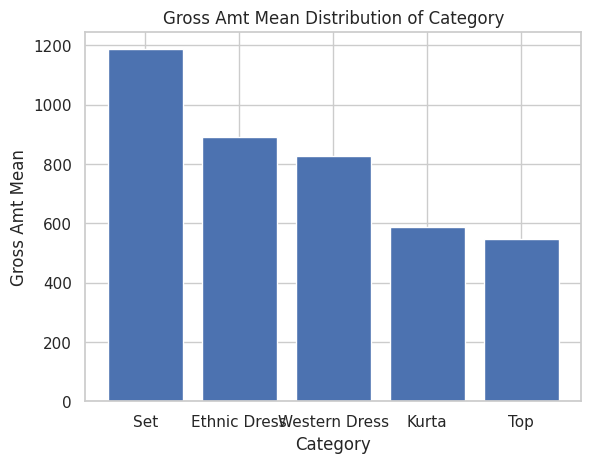

Amani Concept Trading Llc (Kapda)
The Sum of Gross Amt for Category
category
Set       301984.0
Bottom    171804.0
Top       170593.0
Kurta     108784.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Set       3471.080460
Top       2751.500000
Kurta     2653.268293
Bottom    2202.615385
Name: gross amt, dtype: float64


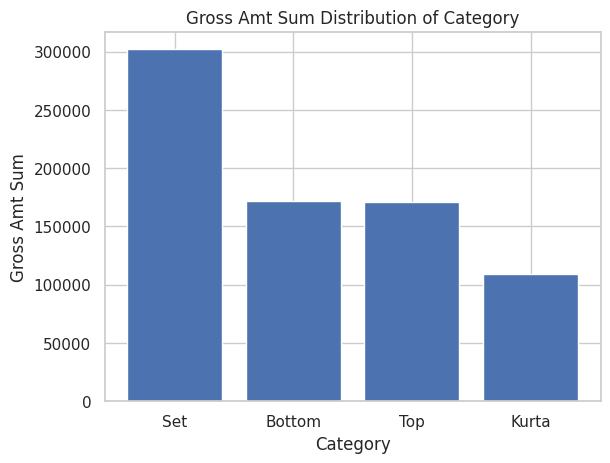

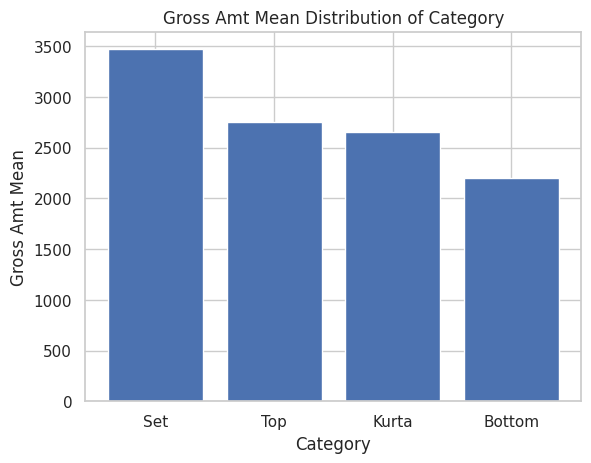

Galaxy Group Of Companies Pvt. Ltd
The Sum of Gross Amt for Category
category
Set             295306.0
Kurta            75728.0
Ethnic Dress      7950.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Set             1085.683824
Ethnic Dress     795.000000
Kurta            676.142857
Name: gross amt, dtype: float64


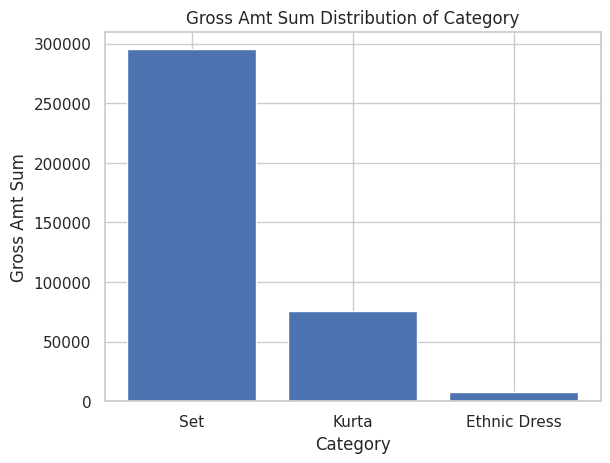

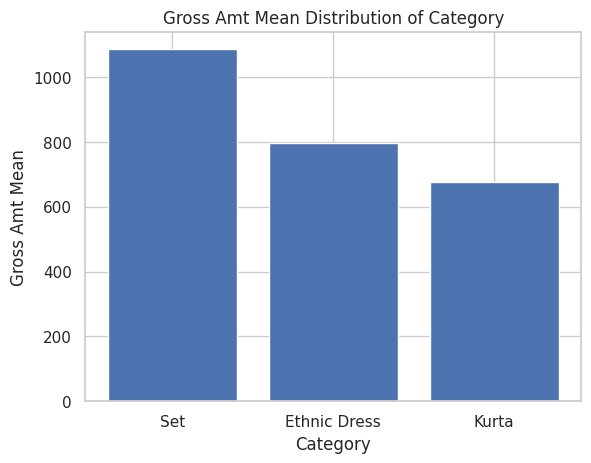

Rivaan Llc
The Sum of Gross Amt for Category
category
Set              190379.0
Kurta            165053.0
Top               14288.0
Western Dress      1443.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Set              1312.958621
Kurta             708.381974
Western Dress     481.000000
Top               460.903226
Name: gross amt, dtype: float64


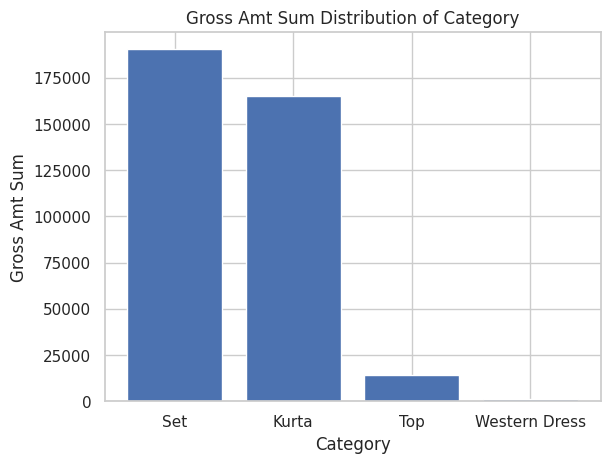

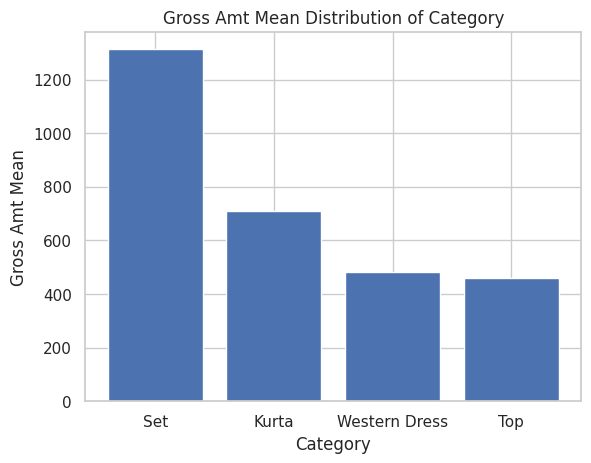

Vaharsha Boutique
The Sum of Gross Amt for Category
category
Kurta           31445.0
Set             20027.0
Top              4006.0
Ethnic Dress     2814.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Ethnic Dress    938.000000
Set             870.739130
Top             572.285714
Kurta           542.155172
Name: gross amt, dtype: float64


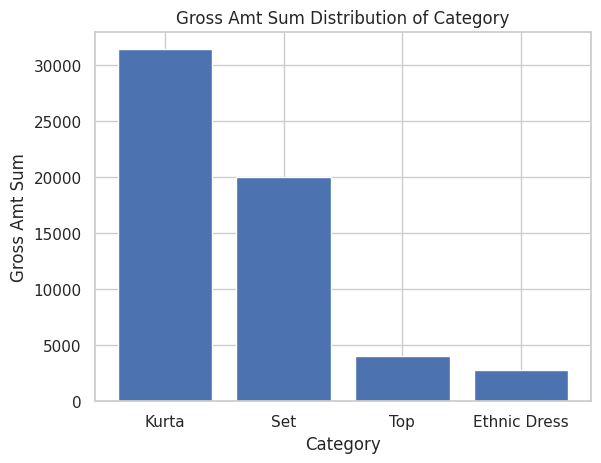

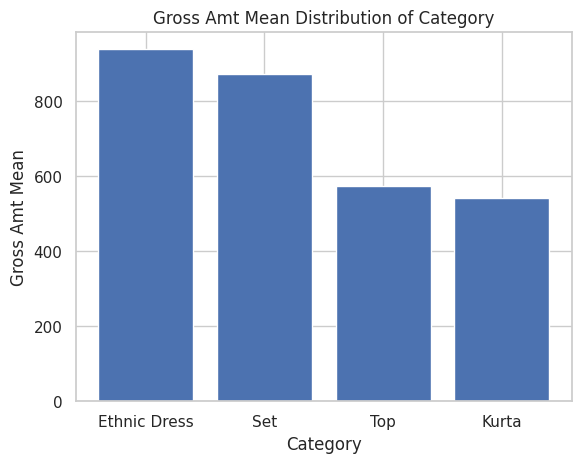

Aanchol
The Sum of Gross Amt for Category
category
Kurta    11452.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Kurta    2863.0
Name: gross amt, dtype: float64


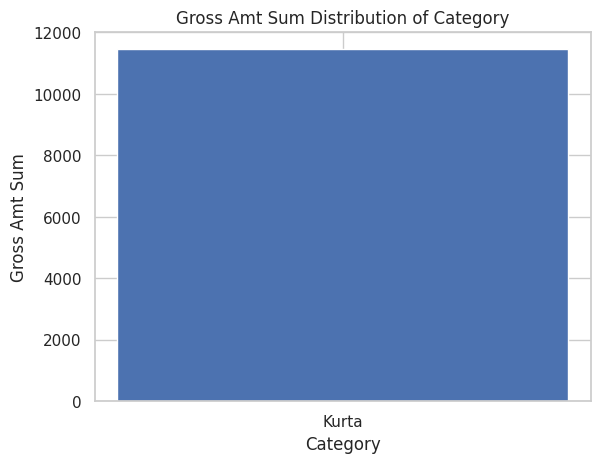

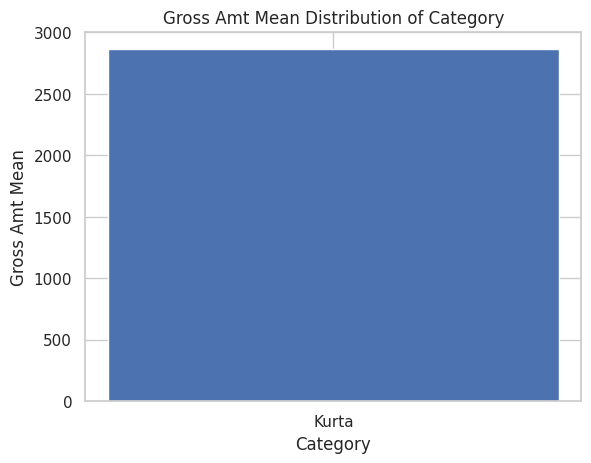

Syeda Morshed
The Sum of Gross Amt for Category
category
Kurta    38291.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Kurta    2735.071429
Name: gross amt, dtype: float64


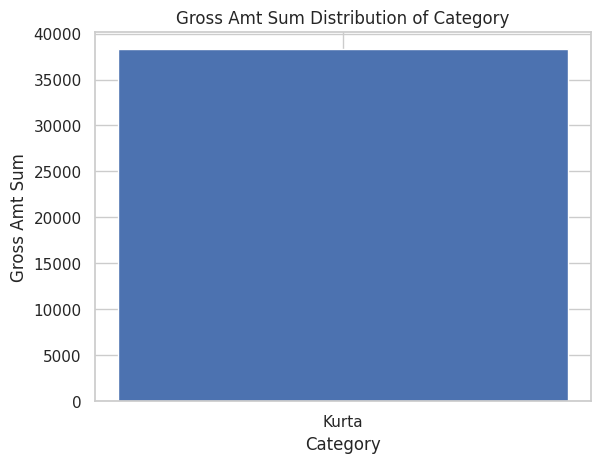

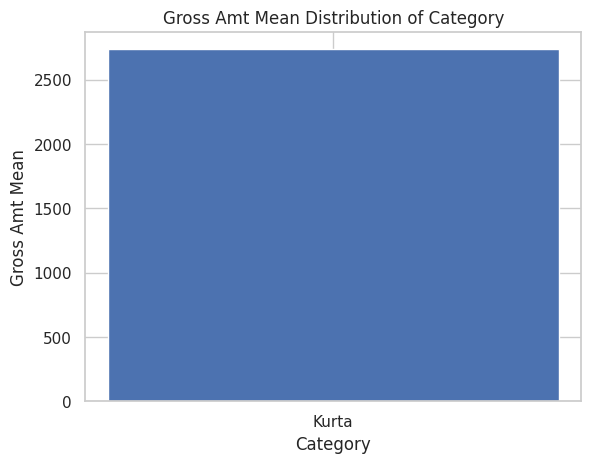

Sure Fashions Llc
The Sum of Gross Amt for Category
category
Set              109435.0
Kurta             65770.0
Western Dress     50206.0
Top               50129.0
Ethnic Dress      32124.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Set              3218.676471
Ethnic Dress     3212.400000
Western Dress    2510.300000
Kurta            1934.411765
Top              1474.382353
Name: gross amt, dtype: float64


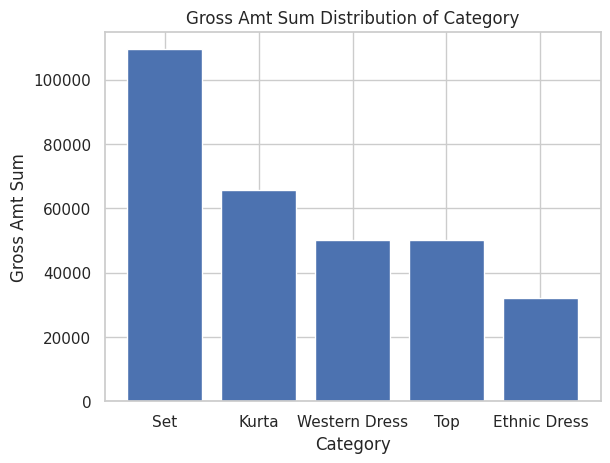

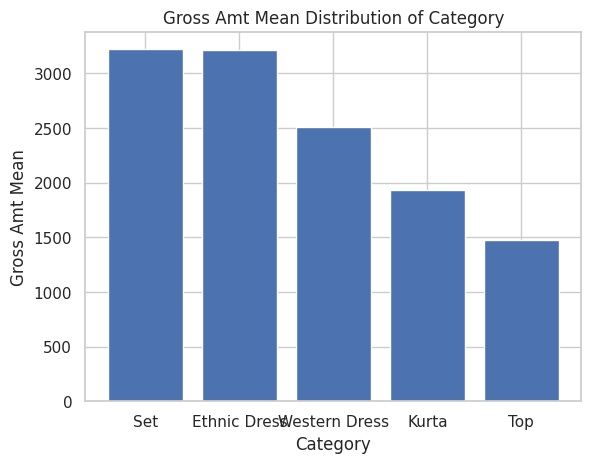

Nitharsha
The Sum of Gross Amt for Category
category
Set              105764.0
Kurta             27985.0
Ethnic Dress       9549.0
Top                5488.0
Western Dress      1689.0
Name: gross amt, dtype: float64
The Mean of Gross Amt for Category
category
Set              2858.486486
Ethnic Dress     2387.250000
Western Dress    1689.000000
Kurta            1399.250000
Top               914.666667
Name: gross amt, dtype: float64


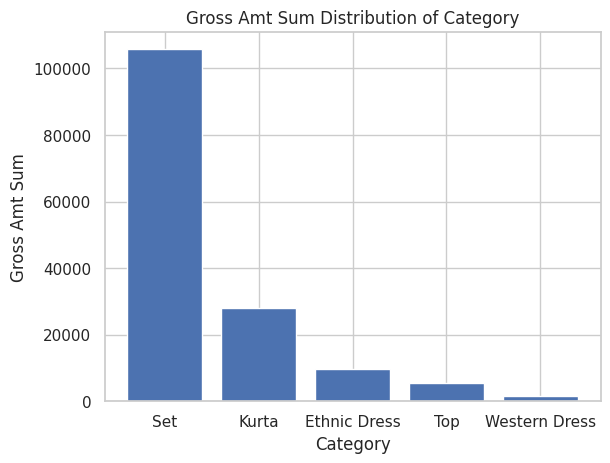

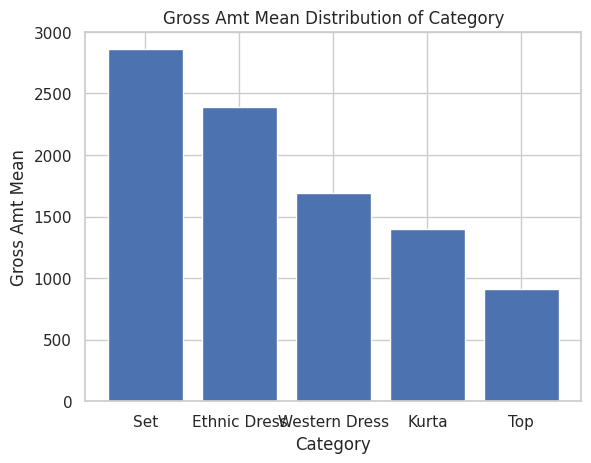

In [128]:


customers_grossamt_sum_top = ['Mulberries Boutique','Amani Concept Trading Llc (Kapda)',
                              'Galaxy Group Of Companies Pvt. Ltd','Rivaan Llc','Vaharsha Boutique']

customers_grossamt_mean_top = ['Aanchol','Amani Concept Trading Llc (Kapda)',
                               'Syeda Morshed','Sure Fashions Llc','Nitharsha']

customers = customers_grossamt_sum_top + customers_grossamt_mean_top

# Remove Duplicate Elements and Reorder
from collections import OrderedDict

unique_customers = list(set(customers))
unique_customers = list(OrderedDict.fromkeys(customers))
customers = unique_customers


for col in customers:
    df_customer = dfm[dfm['customer'] == col ]

    print(col)


    category_sum = df_customer.groupby("category")["gross amt"].sum().sort_values(ascending=False)

    # Display the Result
    print("The Sum of Gross Amt for Category")
    print(category_sum.head(5))

    # Calculate the Average Value of GROSS AMT for Each Category
    category_mean = df_customer.groupby("category")["gross amt"].mean().sort_values(ascending=False)

    # Display the Result
    print("The Mean of Gross Amt for Category")
    print(category_mean.head(5))

    # Draw a Histogram of the Sum of GROSS AMT for Each Category
    plt.bar(category_sum.head(5).index, category_sum.head(5).values)

    plt.title('Gross Amt Sum Distribution of Category')
    plt.xlabel('Category')
    plt.ylabel('Gross Amt Sum')
    plt.show()

    # Draw a Histogram of the GROSS AMT Mean for Each Category
    plt.bar(category_mean.head(5).index, category_mean.head(5).values)

    plt.title('Gross Amt Mean Distribution of Category')
    plt.xlabel('Category')
    plt.ylabel('Gross Amt Mean')
    plt.show()

## K-Means clustering

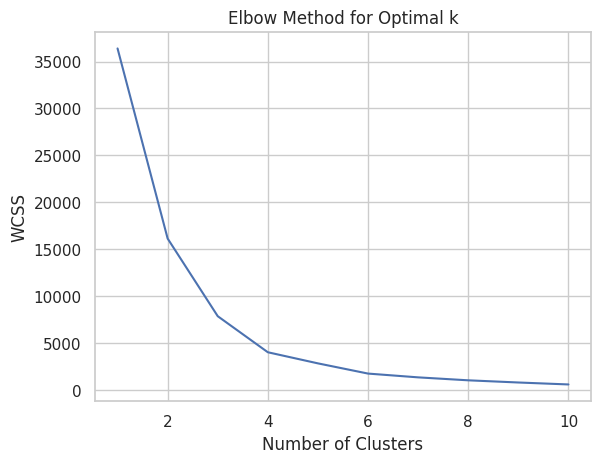

                   sku  gross amt  Cluster
0         Men5004-Kr-L      617.0        9
1        Men5004-Kr-Xl      617.0        9
2       Men5004-Kr-Xxl      617.0        9
3         Men5009-Kr-L      617.0        9
4         Men5011-Kr-L      617.0        9
...                ...        ...      ...
37427  Pjne3423-Kr-4Xl        4.0        2
37428  Pjne3404-Kr-4Xl        5.0        2
37429  Pjne3423-Kr-4Xl        4.0        2
37430  Set290-Kr-Dpt-M        7.0        2
37431         Shipping        0.0        2

[36391 rows x 3 columns]


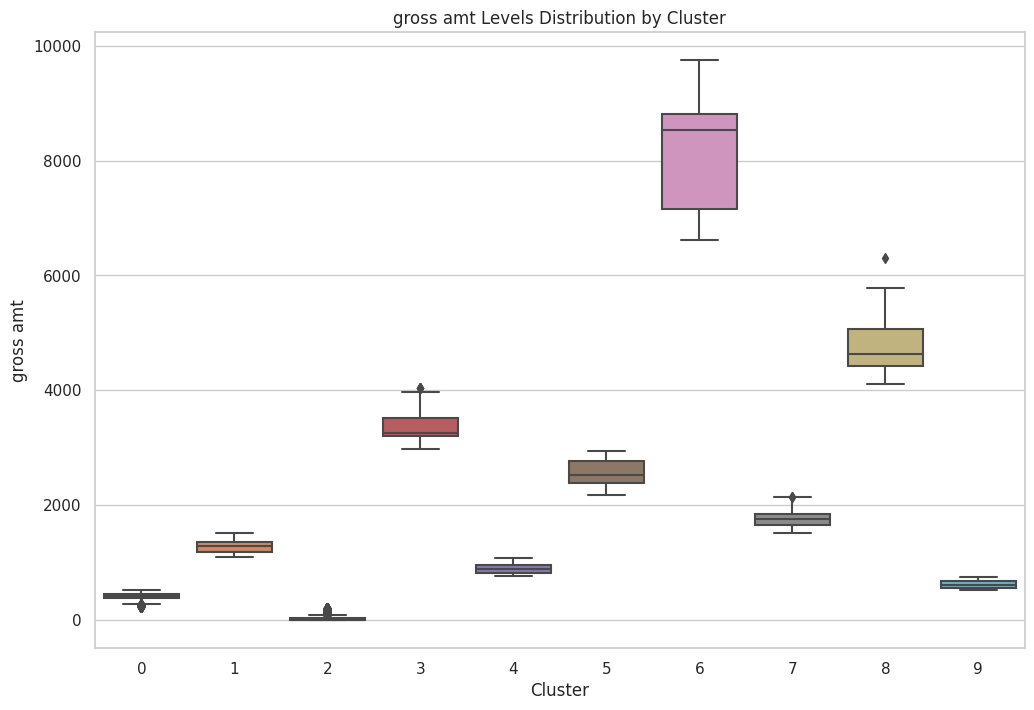

In [129]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

inventory_data = pd.read_csv("cleaned_International_sale_Report.csv")

# Conversion of Object and columns to Categorical Columns
categorical_columns = ['months', 'customer', 'style', 'sku', 'size', 'category']

numerical_columns = ['rate', 'pcs', 'gross amt']

# Remove non-numeric values from numeric columns
for col in numerical_columns:
    inventory_data = inventory_data[pd.to_numeric(inventory_data[col], errors='coerce').notnull()]

# Convert the number to float type
inventory_data[numerical_columns] = inventory_data[numerical_columns].astype(float)

# Converting negative values in numerical columns to positive values
inventory_data[numerical_columns] = inventory_data[numerical_columns].abs()

# Capitalize first letter of strings
inventory_data = inventory_data.applymap(lambda x: x.title() if type(x) == str else x)

# Standardize the data
scaler = StandardScaler()
inventory_data_scaled = scaler.fit_transform(inventory_data[['gross amt']])

# Determine the optimal number of clusters (you can customize this part)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(inventory_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_k = 10  # Change this based on your observation from the elbow plot

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
inventory_data['Cluster'] = kmeans.fit_predict(inventory_data_scaled)

# Display the clustered inventory data
print(inventory_data[['sku', 'gross amt', 'Cluster']])

# Save the clustered data to a new CSV file
inventory_data.to_csv("clustered_International_sale_Report.csv", index=False)

# Sort the DataFrame by Cluster for plotting
df_clusters_sorted = inventory_data.sort_values(by='Cluster')

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='gross amt', data=df_clusters_sorted)
plt.title('gross amt Levels Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('gross amt')
plt.show()


In [130]:


cluster_dataframes = {}
df_clusters = pd.DataFrame(inventory_data)
for cluster_id in df_clusters['Cluster'].unique():
    cluster_dataframes[cluster_id] = df_clusters[df_clusters['Cluster'] == cluster_id]


for cluster_id, cluster_df in cluster_dataframes.items():
    print(f"\nCluster {cluster_id} SKU Analysis:")

    # Display basic statistics
    print(cluster_df['gross amt'].describe())






Cluster 9 SKU Analysis:
count    4977.000000
mean      623.097597
std        68.421815
min       521.000000
25%       561.000000
50%       619.000000
75%       681.000000
max       760.000000
Name: gross amt, dtype: float64

Cluster 0 SKU Analysis:
count    6219.000000
mean      418.773832
std        64.771118
min       227.000000
25%       388.000000
50%       428.000000
75%       462.000000
max       520.000000
Name: gross amt, dtype: float64

Cluster 4 SKU Analysis:
count    4018.000000
mean      899.227103
std        87.061335
min       762.000000
25%       825.000000
50%       888.000000
75%       969.000000
max      1087.500000
Name: gross amt, dtype: float64

Cluster 1 SKU Analysis:
count    2333.000000
mean     1285.189023
std       115.122472
min      1094.000000
25%      1183.000000
50%      1286.000000
75%      1354.000000
max      1522.000000
Name: gross amt, dtype: float64

Cluster 5 SKU Analysis:
count     391.000000
mean     2558.892583
std       224.758882
min      217

# Stock inventory

## Data cleaning

Missing Values in Each Column:
months       0
customer     0
style        0
size         0
pcs          0
rate         0
gross amt    0
category     0
dtype: int64
Missing Values in Each Column:
index          0
SKU Code      49
Design No.     2
Stock          2
Category      11
Size           2
Color         11
dtype: int64
-----------------------------
Unique value counts after changing NaN:
Unknown              64
PJNE3404-KR-4XL       2
PJNE3404-KR-5XL       2
PJNE3405-KR-6XL       2
PJNE3405-KR-5XL       2
                     ..
JAN8634-KR-NP-L       1
JAN8633-KR-NP-XXL     1
JAN8633-KR-NP-XL      1
JAN8633-KR-NP-S       1
SET462-KR-NP-XXXL     1
Name: SKU Code, Length: 9170, dtype: int64
Missing Values in Each Column:
index          0
SKU Code       0
Design No.     2
Stock          2
Category      11
Size           2
Color         11
dtype: int64
-------


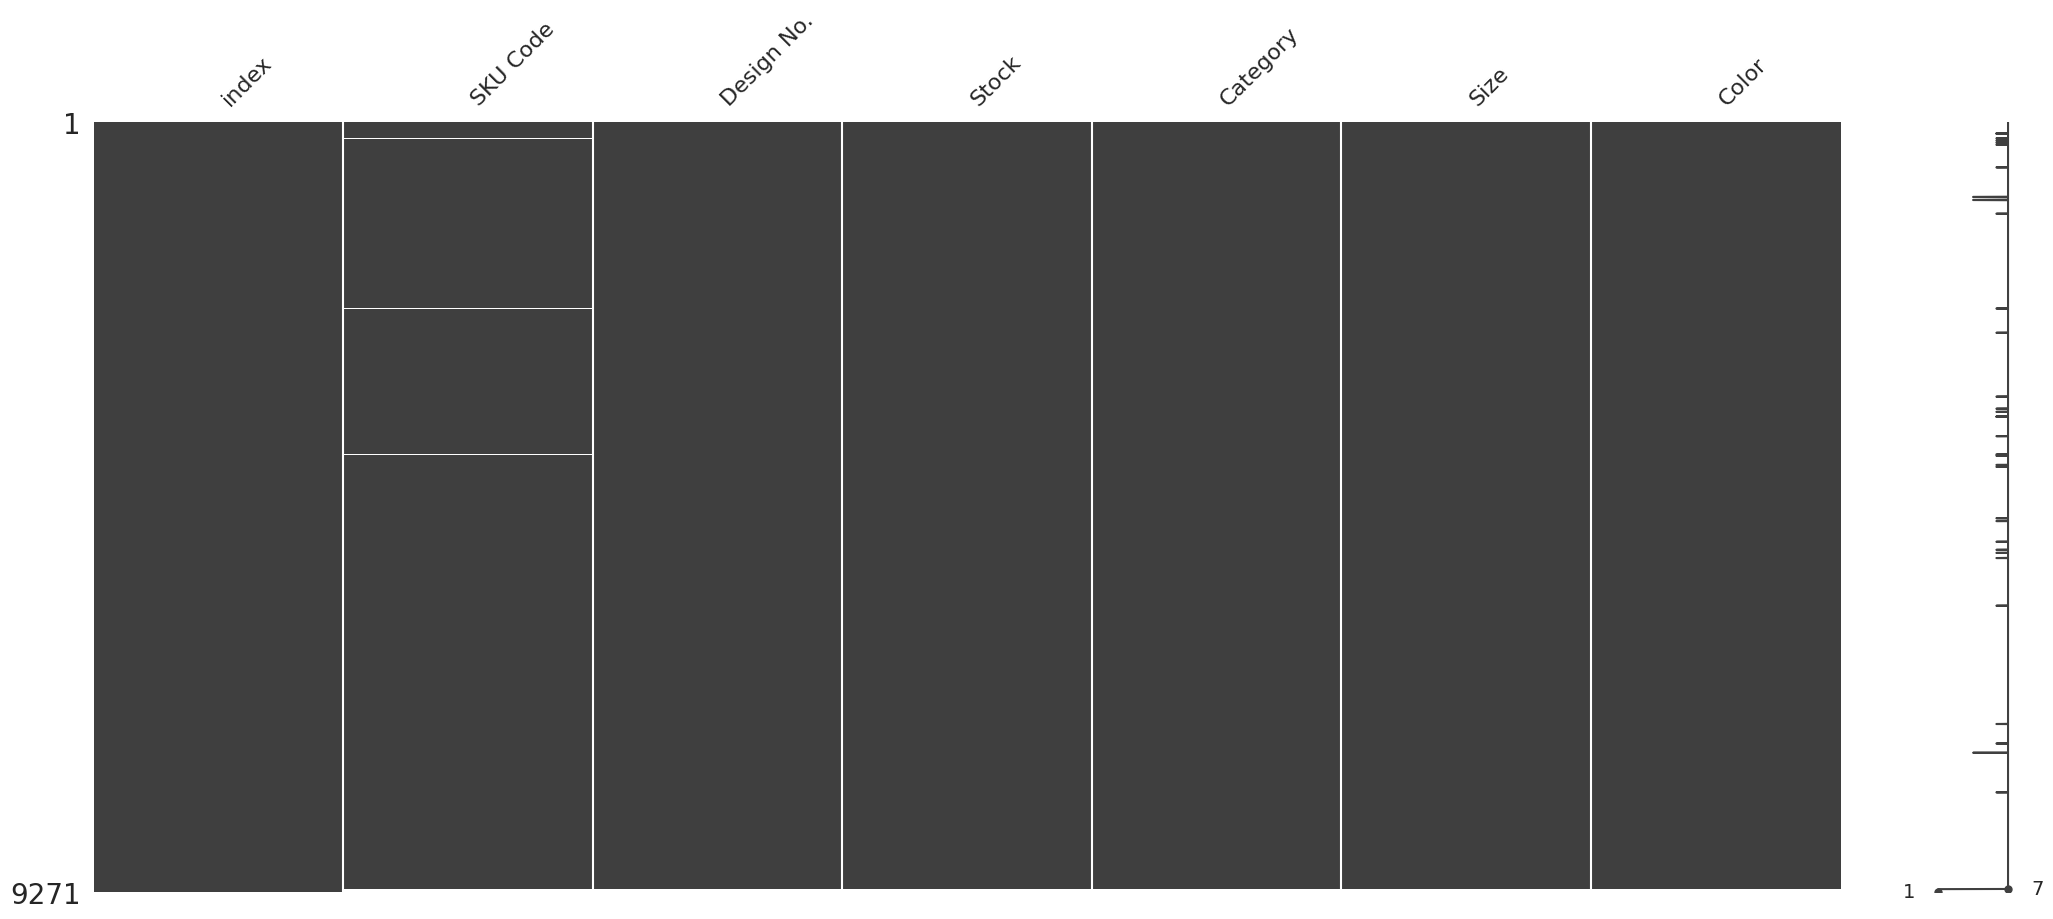

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

df1 = pd.read_csv("Sale_Report.csv", header=0)
import missingno as mn
mn.matrix(df1)
print("Missing Values in Each Column:")
print(missing_values)
# fill in the missing values with 'Unknown'
df1 = df1.drop(df1.index[9237:9273]) # these rows contain no information
missing_values = df1.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

df1['SKU Code'].fillna('Unknown', inplace=True)
df1['SKU Code'] = df1['SKU Code'].replace('#REF!', 'Unknown')
print('-----------------------------')
print('Unique value counts after changing NaN:')
print(df1['SKU Code'].value_counts(dropna=False))



missing_values = df1.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
print('-------')

df1.to_csv("cleaned_Sale_Report.csv", index=False)




In [132]:
df5 = pd.read_csv("cleaned_Sale_Report.csv", header=0)
for col in df5.columns:
    missing_rows = df5[df5[col].isnull()]

    if not missing_rows.empty:
        print(f"Column: {col}")
        print("Rows with missing values:")
        print(missing_rows)
        print("\n")

df_cleaned = df5.dropna()
df_cleaned.to_csv("cleaned_Sale_Report.csv", index=False)
missing_values = df_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)



Column: Design No.
Rows with missing values:
      index SKU Code Design No.  Stock Category Size Color
9235   9235  Unknown        NaN    NaN      NaN  NaN   NaN
9236   9236  Unknown        NaN    NaN      NaN  NaN   NaN


Column: Stock
Rows with missing values:
      index SKU Code Design No.  Stock Category Size Color
9235   9235  Unknown        NaN    NaN      NaN  NaN   NaN
9236   9236  Unknown        NaN    NaN      NaN  NaN   NaN


Column: Category
Rows with missing values:
      index SKU Code Design No.  Stock Category  Size Color
901     901  Unknown      J0055    0.0      NaN     S   NaN
902     902  Unknown      J0055    0.0      NaN    XL   NaN
903     903  Unknown      J0055    0.0      NaN    XS   NaN
904     904  Unknown      J0055    0.0      NaN   XXL   NaN
938     938  Unknown      J0071    0.0      NaN     S   NaN
939     939  Unknown      J0071    0.0      NaN    XS   NaN
940     940  Unknown      J0071    0.0      NaN  XXXL   NaN
7593   7593  Unknown     SET111   

In [133]:
print(df1['SKU Code'].value_counts(dropna=False))
print(df1['Design No.'].value_counts(dropna=False))
print(df1['Stock'].value_counts(dropna=False))
print(df1['Category'].value_counts(dropna=False))
print(df1['Size'].value_counts(dropna=False))
print(df1['Color'].value_counts(dropna=False))
categorical_columns = ['SKU Code', 'Design No.', 'Category', 'Size', 'Color']

Unknown              64
PJNE3404-KR-4XL       2
PJNE3404-KR-5XL       2
PJNE3405-KR-6XL       2
PJNE3405-KR-5XL       2
                     ..
JAN8634-KR-NP-L       1
JAN8633-KR-NP-XXL     1
JAN8633-KR-NP-XL      1
JAN8633-KR-NP-S       1
SET462-KR-NP-XXXL     1
Name: SKU Code, Length: 9170, dtype: int64
J0096      10
JNE3404     9
JNE3445     9
JNE3440     9
JNE3405     9
           ..
SAR149      1
SAR062      1
SAR061      1
SAR060      1
SAR063      1
Name: Design No., Length: 1595, dtype: int64
2.0      1000
3.0       786
1.0       625
0.0       584
4.0       575
         ... 
446.0       1
230.0       1
985.0       1
757.0       1
245.0       1
Name: Stock, Length: 296, dtype: int64
KURTA                   3726
KURTA SET               1598
SET                     1050
TOP                      865
DRESS                    700
BLOUSE                   241
NIGHT WEAR               217
TUNIC                    154
SAREE                    147
AN : LEGGINGS            131
PALAZZO    

## Visualisations

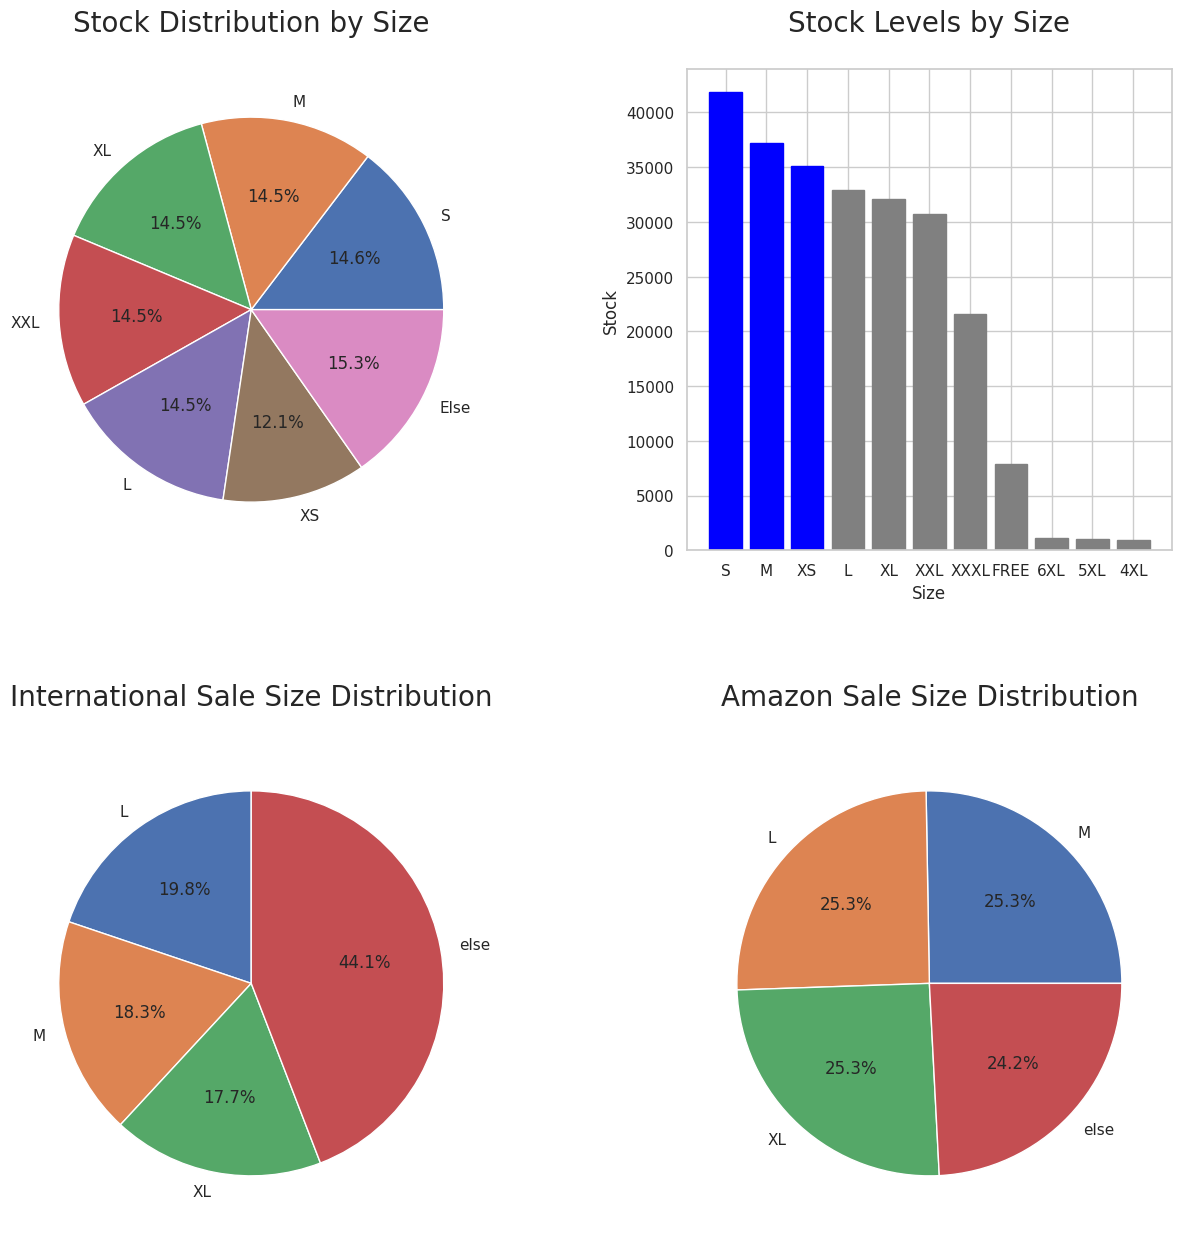

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

# Load the datasets
df1 = pd.read_csv("cleaned_Sale_Report.csv", header=0)
df2 = pd.read_csv("cleaned_International_sale_Report.csv", header=0)
df3 = pd.read_csv("cleaned_Amazon_Sale_Report.csv", header=0, encoding="utf-8", error_bad_lines=False)
df4 = df1



fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Plot the first chart
sizes = df1['Size'].value_counts()
sizes['Else'] = sizes[['XXXL', '4XL', '5XL', '6XL', 'FREE']].sum()
sizes = sizes.drop(labels=['XXXL', '4XL', '5XL', '6XL', 'FREE'])
total_stock = sizes.sum()
sizes_percentage = sizes / total_stock * 100
axs[0, 0].pie(sizes, labels=sizes.index, autopct='%1.1f%%')
axs[0, 0].set_title('Stock Distribution by Size',fontsize=20, x=0.5, y=1.05, pad=10)


data = pd.read_csv("cleaned_Sale_Report.csv")

# Map sizes to aggregated sizes
size_map = {'S': 'S', 'M': 'M', 'L': 'L', 'XL': 'XL', 'XXL': '2XL', 'XXXL': '3XL', '4XL': '4XL', '5XL': '5XL', '6XL': '6XL', 'FREE': 'FREE'}
data['AggregatedSize'] = data['Size'].map(size_map)

# Calculate the sum of stock levels for each aggregated size
data_by_aggregated_size = data.groupby('Size').sum().reset_index()


data_by_aggregated_size = data_by_aggregated_size.sort_values('Stock', ascending=False)


data_by_aggregated_size['Highlighted'] = False
data_by_aggregated_size.loc[0:2, 'Highlighted'] = True


bars = axs[0,1].bar(data_by_aggregated_size['Size'], data_by_aggregated_size['Stock'])
for i in range(len(bars)):
    if i < 3:
        bars[i].set_color('blue')
    else:
        bars[i].set_color('gray')
axs[0,1].set(xlabel='Size', ylabel='Stock')
axs[0,1].set_title('Stock Levels by Size', fontsize=20, x=0.5, y=1.05, pad=10)



valid_sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', '4XL', '5XL', '6XL', 'FREE']
df2 = df2[df2['size'].isin(valid_sizes)]
df2['pcs'] = pd.to_numeric(df2['pcs'], errors='coerce')
size_counts = df2.groupby('size').size().reset_index(name='count')
size_counts = size_counts.sort_values(by='count', ascending=False)
top_sizes = size_counts.head(3)
other_sizes_count = size_counts.iloc[3:]['count'].sum()
other_sizes = pd.DataFrame({'size': ['else'], 'count': [other_sizes_count]})
top_sizes = pd.concat([top_sizes, other_sizes], ignore_index=True)
total_sales = df2['pcs'].sum()
top_sizes['percentage'] = top_sizes['count'] / total_sales * 100
axs[1, 0].pie(top_sizes['percentage'], labels=top_sizes['size'], autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('International Sale Size Distribution',fontsize=20, x=0.5, y=1.05, pad=10)

# Plot the third chart
sizes = df3['size']
allowed_sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'FREE']
sizes = sizes[sizes.isin(allowed_sizes)]
size_counts = sizes.value_counts()
total_sales = df3['qty'].sum()
top_sizes = size_counts[:3].index.tolist()
top_sizes_count = size_counts[top_sizes].sum()
top_sizes_percentage = top_sizes_count / total_sales * 100
else_count = size_counts.drop(top_sizes).sum()
else_percentage = else_count / total_sales * 100
labels = top_sizes + ['else']
values = [top_sizes_percentage] * len(top_sizes) + [else_percentage]
axs[1, 1].pie(values, labels=labels, autopct='%1.1f%%')
axs[1, 1].set_title('Amazon Sale Size Distribution',fontsize=20, x=0.5, y=1.05, pad=10)

# Remove the fourth subplot
#fig.delaxes(axs[0, 1])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()




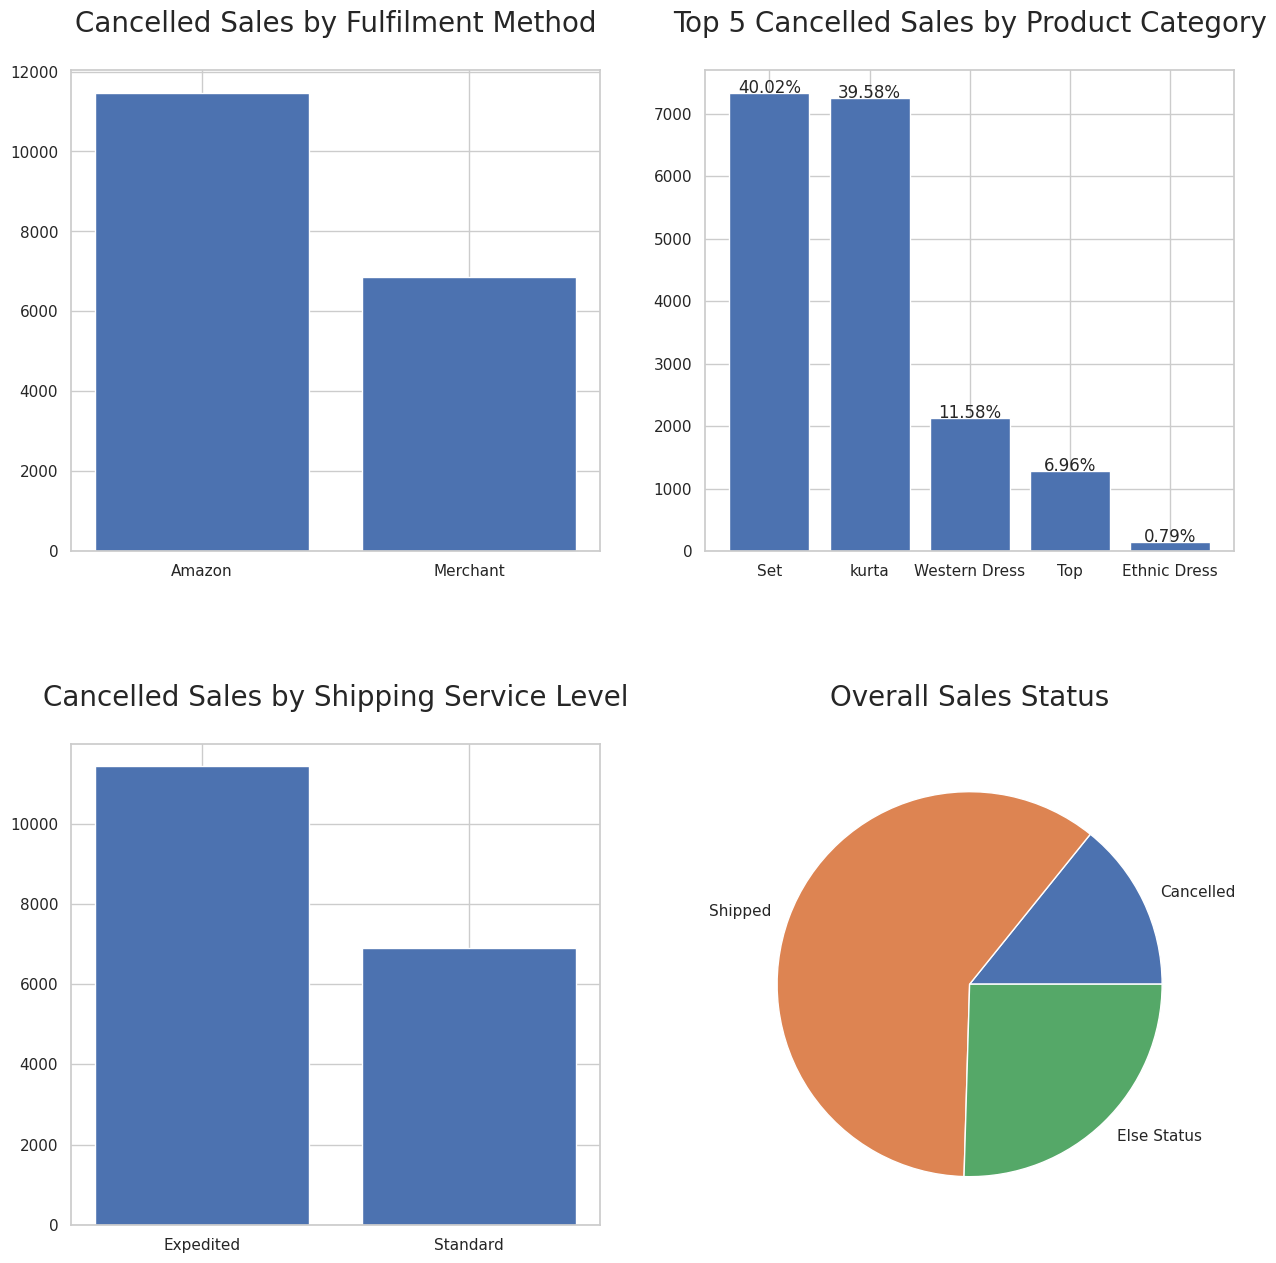

In [135]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Amazon_Sale_Report.csv", header=0, encoding="utf-8")

# filter the dataframe to only include shipped and cancelled sales
filtered_df = df[df['Status'].isin(['Shipped', 'Cancelled'])]

# group the filtered dataframe by status and calculate the count
by_status = filtered_df.groupby('Status').count()['SKU']

# create a new column called 'Grouped Status' to group all other status types into 'Else Status'
df['Grouped Status'] = df['Status'].apply(lambda x: x if x in ['Shipped', 'Cancelled'] else 'Else Status')


by_grouped_status = df.groupby('Grouped Status').count()['SKU']

# create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

cancelled_df = filtered_df[filtered_df['Status'] == 'Cancelled']
by_fulfilment = cancelled_df.groupby('Fulfilment').count()['SKU']
axs[0, 0].bar(by_fulfilment.index, by_fulfilment.values)
axs[0, 0].set_title('Cancelled Sales by Fulfilment Method',fontsize=20, x=0.5, y=1.05, pad=10)

# group cancelled sales by product category and calculate the count
by_category = cancelled_df.groupby('Category').count()['SKU']

# sort the categories by the count of cancelled sales
by_category = by_category.sort_values(ascending=False)

# keep only the top 5 categories
top_category = by_category[:5]

# calculate the percentage of cancelled sales for each top category
category_percentages = (top_category / cancelled_df.shape[0]) * 100

# create a bar chart to show the cancelled sales by top 5 product categories
axs[0, 1].bar(top_category.index, top_category.values)
axs[0, 1].set_title('Top 5 Cancelled Sales by Product Category',fontsize=20, x=0.5, y=1.05, pad=10)

# add the percentage labels to the bar chart
for i, v in enumerate(top_category.values):
    axs[0, 1].text(i, v+5, f'{category_percentages.values[i]:.2f}%', ha='center')



# create a bar chart to show the cancelled sales by shipping service level
by_shipping = cancelled_df.groupby('ship-service-level').count()['SKU']
axs[1, 0].bar(by_shipping.index, by_shipping.values)
axs[1, 0].set_title('Cancelled Sales by Shipping Service Level',fontsize=20, x=0.5, y=1.05, pad=10)

# create a pie chart to show the overall status of sales
by_status = filtered_df.groupby('Status').count()['SKU']
by_status['Else Status'] = df.groupby('Grouped Status').count()['SKU']['Else Status']
axs[1, 1].pie(by_status.values, labels=by_status.index)
axs[1, 1].set_title('Overall Sales Status',fontsize=20, x=0.5, y=1.05, pad=10)

# adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# show the combined chart
plt.show()


## K-Means Clustering

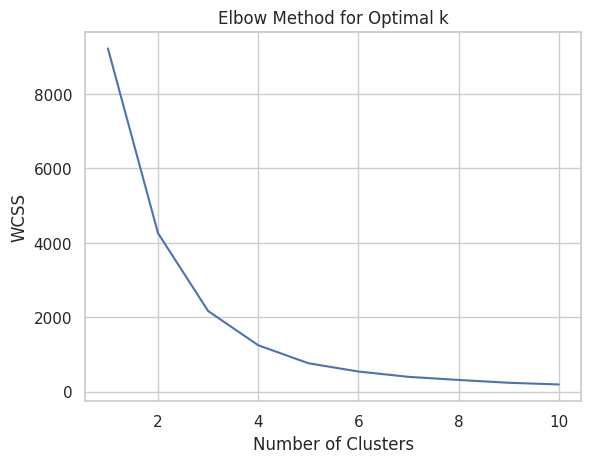

               SKU Code  Stock  Cluster
0           AN201-RED-L    5.0        0
1           AN201-RED-M    5.0        0
2           AN201-RED-S    3.0        0
3          AN201-RED-XL    6.0        0
4         AN201-RED-XXL    3.0        0
...                 ...    ...      ...
9221     SET462-KR-NP-S   44.0        8
9222    SET462-KR-NP-XL   58.0        8
9223    SET462-KR-NP-XS   20.0        5
9224   SET462-KR-NP-XXL   66.0        8
9225  SET462-KR-NP-XXXL   40.0        8

[9226 rows x 3 columns]
               SKU Code  Stock  Cluster
0           AN201-RED-L    5.0        0
1           AN201-RED-M    5.0        0
2           AN201-RED-S    3.0        0
3          AN201-RED-XL    6.0        0
4         AN201-RED-XXL    3.0        0
...                 ...    ...      ...
9221     SET462-KR-NP-S   44.0        8
9222    SET462-KR-NP-XL   58.0        8
9223    SET462-KR-NP-XS   20.0        5
9224   SET462-KR-NP-XXL   66.0        8
9225  SET462-KR-NP-XXXL   40.0        8

[9226 rows x 3

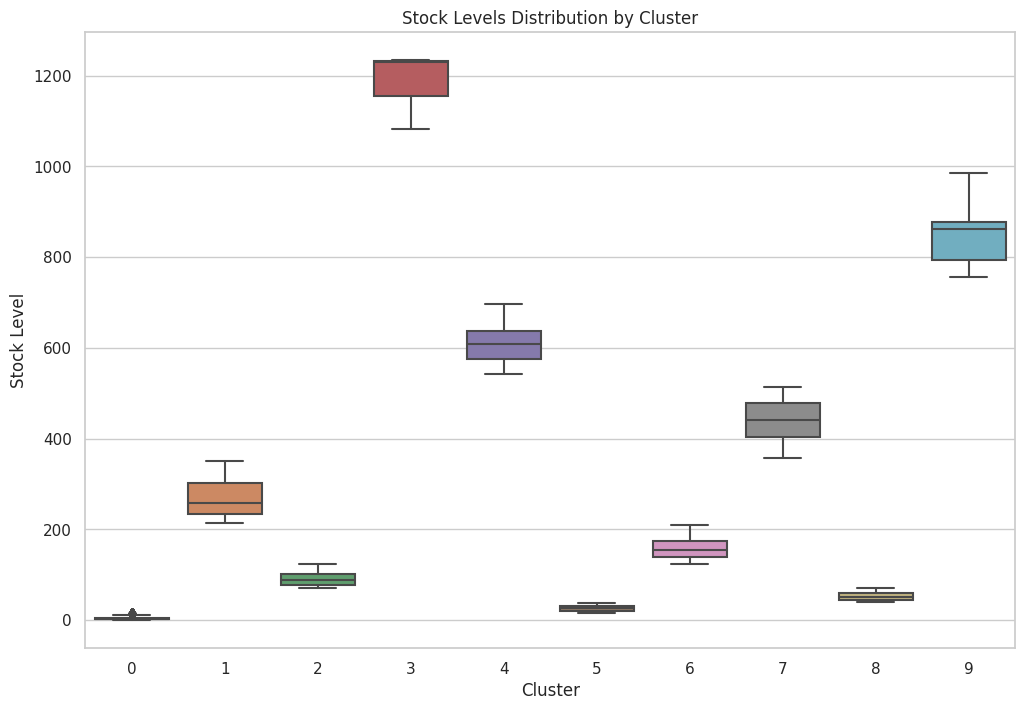

In [137]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


inventory_data = pd.read_csv("cleaned_Sale_Report.csv", header=0)


# Standardize the data
scaler = StandardScaler()
inventory_data_scaled = scaler.fit_transform(inventory_data[['Stock']])


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(inventory_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


optimal_k = 10

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
inventory_data['Cluster'] = kmeans.fit_predict(inventory_data_scaled)

# Display the clustered inventory data
print(inventory_data[['SKU Code', 'Stock', 'Cluster']])

# Save the clustered data to a new CSV file
inventory_data.to_csv("clustered_Sale_Report.csv", index=False)


optimal_k = 10


kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
inventory_data['Cluster'] = kmeans.fit_predict(inventory_data_scaled)

# Display the clustered inventory data
print(inventory_data[['SKU Code', 'Stock', 'Cluster']])

# Save the clustered data to a new CSV file
inventory_data.to_csv("clustered_Sale_Report.csv", index=False)

df_clusters_sorted = inventory_data.sort_values(by='Cluster')


sns.set(style="whitegrid")

# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Stock', data=df_clusters_sorted)
plt.title('Stock Levels Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Stock Level')
plt.show()



In [138]:


# Step 1: Create separate DataFrames for each cluster
cluster_dataframes = {}
df_clusters = pd.DataFrame(inventory_data)
for cluster_id in df_clusters['Cluster'].unique():
    cluster_dataframes[cluster_id] = df_clusters[df_clusters['Cluster'] == cluster_id]

# Step 2: Analyze SKUs within each cluster
for cluster_id, cluster_df in cluster_dataframes.items():
    print(f"\nCluster {cluster_id} SKU Analysis:")

    # Display basic statistics
    print(cluster_df['Stock'].describe())



Cluster 0 SKU Analysis:
count    5707.000000
mean        4.466445
std         3.764732
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        15.000000
Name: Stock, dtype: float64

Cluster 5 SKU Analysis:
count    1717.000000
mean       26.462434
std         6.738403
min        16.000000
25%        21.000000
50%        26.000000
75%        32.000000
max        39.000000
Name: Stock, dtype: float64

Cluster 2 SKU Analysis:
count    427.000000
mean      90.901639
std       14.079075
min       72.000000
25%       78.000000
50%       89.000000
75%      101.000000
max      123.000000
Name: Stock, dtype: float64

Cluster 8 SKU Analysis:
count    1078.000000
mean       52.999072
std         8.895608
min        40.000000
25%        45.000000
50%        52.000000
75%        60.000000
max        71.000000
Name: Stock, dtype: float64

Cluster 4 SKU Analysis:
count      9.000000
mean     613.333333
std       51.461150
min      542.000000
25%      575.000000